# **Assignment 2**
* Team 6
* 24510099 Kim Dayeon
* 24510106 Park Jihyun
* 24510109 Lee Hanjong

## **1. Selection of Features**

### **1) Selection of Features Description**

1. 전기요금`[electricity_cost]` : Electricity Cost
2. 날짜, 시간 `[date]`, `[hour] ` : Factory operation date and time
3. 시간대별 피트타임 전력사용량 `[min15, min30, min45, min60]` : Peak electricity usage
4. 전력생산량`[production]` : Production volume
5. 기온 `[temperature]` : Temperature
6. 공장직원 `[factory_staff]` : Production capacity of the factory







### **2) Reason of selection**
1. 전기요금`[electricity_cost]` : Selected as a feature to examine its relationship with seasons, as there are three distinct electricity cost levels.
2. 날짜, 시간 `[date]`, `[hour] ` : Selected as features to investigate differences in peak-time electricity usage distribution by month, time of day, and weekday/weekend.
3. 시간대별 피트타임 전력사용량 `[min15, min30, min45, min60]` : Selected as a feature to identify outliers through scaling and to analyze distributions by morning/afternoon and by season.
4. 전력생산량`[production]` : Shows a long-tail distribution with most data concentrated near 0. Selected as a feature to analyze seasonal distributions after scaling and to evaluate production efficiency (productivity relative to cost).
5. 기온 `[temperature]` : Correlation analysis revealed a relationship between temperature and peak-time electricity usage. Selected as a feature to perform k-means binning and analyze peak-time electricity usage by temperature range.
6. 공장직원 `[factory_staff]` : Shows a long-tail distribution with most data concentrated near 0. Selected as a feature to examine monthly, time-based, and production efficiency (production relative to staff count) distributions after scaling.
7. 인건비 `[labor_cost]`: Selected as a feature to identify optimal distributions by analyzing variations in data distribution across time periods day/night.

## **2. Feature Transformations**

In [1]:
# 0. Install Libraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import KBinsDiscretizer

In [2]:
# 1. Read Dataset
df = pd.read_csv('./okm_augumented_2021.csv')
df.head()

,날짜,시간,15분,30분,45분,60분,평균,생산량,기온,풍속,습도,강수량,전기요금(계절),day,d,m,공장인원,인건비
0,20210101,0,62,61,61,61,61,0,-3.2,2.4,71,0.0,109.8,5,1,1,0.0,1.5
1,20210101,1,96,93,116,113,105,0,-4.5,1.5,77,0.0,109.8,5,1,1,0.0,1.5
2,20210101,2,106,96,106,107,104,0,-3.9,2.6,58,0.0,109.8,5,1,1,0.0,1.5
3,20210101,3,92,110,110,109,105,0,-4.1,2.6,56,0.0,109.8,5,1,1,0.0,1.5
4,20210101,4,108,105,106,108,107,0,-4.6,2.6,60,0.0,109.8,5,1,1,0.0,1.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6168 entries, 0 to 6167
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   날짜        6168 non-null   int64  
 1   시간        6168 non-null   int64  
 2   15분       6168 non-null   int64  
 3   30분       6168 non-null   int64  
 4   45분       6168 non-null   int64  
 5   60분       6168 non-null   int64  
 6   평균        6168 non-null   int64  
 7   생산량       6168 non-null   int64  
 8   기온        6168 non-null   float64
 9   풍속        6165 non-null   float64
 10  습도        6168 non-null   int64  
 11  강수량       6167 non-null   float64
 12  전기요금(계절)  6168 non-null   float64
 13  day       6168 non-null   int64  
 14  d         6168 non-null   int64  
 15  m         6168 non-null   int64  
 16  공장인원      6151 non-null   float64
 17  인건비       6168 non-null   float64
dtypes: float64(6), int64(12)
memory usage: 867.5 KB


In [4]:
# 2. Data Preprocessing
df.isnull().sum()

,0
날짜,0
시간,0
15분,0
30분,0
45분,0
60분,0
평균,0
생산량,0
기온,0
풍속,3


* The dataset has missing valuses
  * Wind Speed: 3 missing values
  * Precipitation: 1 missing values
  * Factory Staff: 17 missing values

In [5]:
df_c = df.copy()

df_c.fillna(0, inplace =True)
df_c.isnull().sum()

,0
날짜,0
시간,0
15분,0
30분,0
45분,0
60분,0
평균,0
생산량,0
기온,0
풍속,0


* All missing values replaced with 0.

In [6]:
# Change Column Name to English
df_c.rename(columns={
    '날짜': 'date',
    '시간': 'hour',
    '15분': 'min_15',
    '30분': 'min_30',
    '45분': 'min_45',
    '60분': 'min_60',
    '평균': 'average',
    '생산량': 'production',
    '기온': 'temperature',
    '풍속': 'wind_speed',
    '습도': 'humidity',
    '강수량': 'precipitation',
    '전기요금(계절)': 'electricity_cost',
    'day': 'day',
    'd': 'd',
    'm': 'm',
    '공장인원': 'factory_staff',
    '인건비': 'labor_cost'
}, inplace=True)

# Drop Column
columns_to_drop = ['wind_speed', 'humidity', 'precipitation', 'd']
df_c = df_c.drop(columns=columns_to_drop)

* All column names changed to English and unnecessary columns were removed.

### **1) Electricity Cost**

In [7]:
electricity_cost_counts = df_c.copy()

electricity_cost_counts = electricity_cost_counts['electricity_cost'].value_counts().reset_index()
electricity_cost_counts.columns = ['electricity_cost', 'count']
electricity_cost_counts.head()

,electricity_cost,count
0,167.2,2544
1,191.6,2208
2,109.8,1416


In [8]:
def classify_season(month):
    if month in [1, 2]:
        return 'Winter'
    elif month in [3, 4, 5, 9]:
        return 'Spring/Fall'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'None'

In [9]:
df2 = df_c.copy()
df2['season'] = df2['m'].apply(classify_season)
df2.head()

,date,hour,min_15,min_30,min_45,min_60,average,production,temperature,electricity_cost,day,m,factory_staff,labor_cost,season
0,20210101,0,62,61,61,61,61,0,-3.2,109.8,5,1,0.0,1.5,Winter
1,20210101,1,96,93,116,113,105,0,-4.5,109.8,5,1,0.0,1.5,Winter
2,20210101,2,106,96,106,107,104,0,-3.9,109.8,5,1,0.0,1.5,Winter
3,20210101,3,92,110,110,109,105,0,-4.1,109.8,5,1,0.0,1.5,Winter
4,20210101,4,108,105,106,108,107,0,-4.6,109.8,5,1,0.0,1.5,Winter


<ipython-input-10-614f2322bf98>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(data=electricity_cost_counts, x='electricity_cost', y='count', palette='viridis', ax=axes[0])


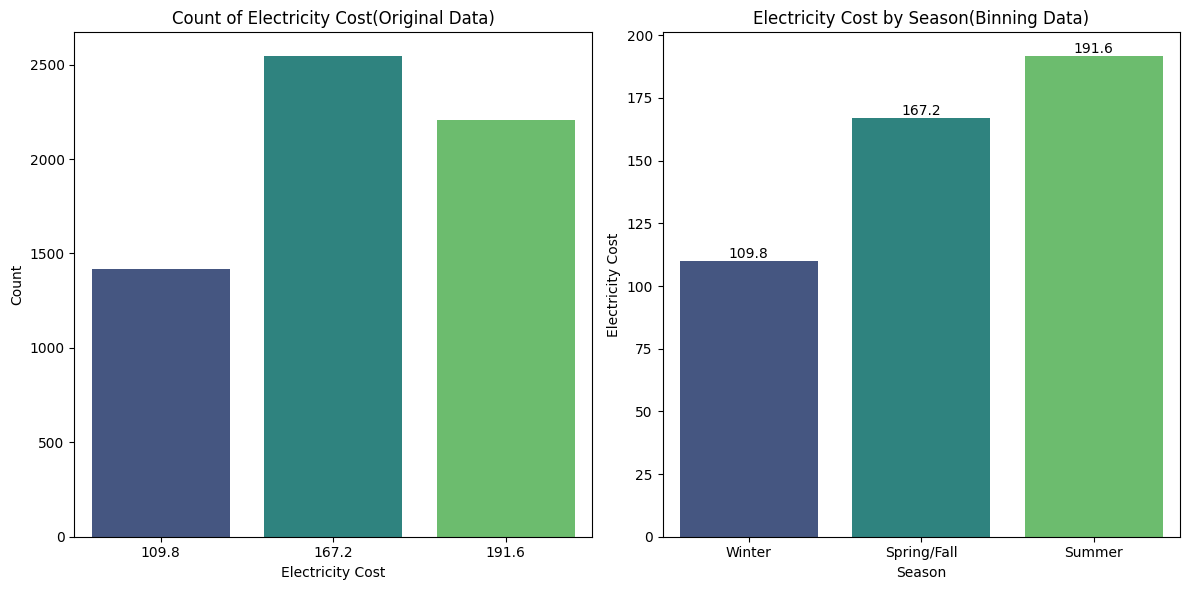

In [10]:
# 플롯 초기화 및 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 왼쪽플롯 - 전기요금 개수
ax1 = sns.barplot(data=electricity_cost_counts, x='electricity_cost', y='count', palette='viridis', ax=axes[0])
ax1.set_title("Count of Electricity Cost(Original Data)")
ax1.set_xlabel("Electricity Cost")
ax1.set_ylabel("Count")

# 오른쪽 플롯 - 계절별 전기요금
ax2 = sns.barplot(data=df2, x='season', y='electricity_cost', hue='season', dodge=False, palette='viridis', ax=axes[1])
ax2.set_title("Electricity Cost by Season(Binning Data)")
ax2.set_xlabel("Season")
ax2.set_ylabel("Electricity Cost")
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height:.1f}', (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

**Interpretation**

* `Electricity Cost` are highest in summer and lowest in winter.
* `Electricity Cost Count` was not meaningful data only covered the months from January to September, and specifically, the 167.2 price was a combined value for spring and fall.

* We classified the months as follows:
  * Winter: [January, February]
  * Spring/Fall: [March, April, May, September]
  * Summer: [June, July, August]
* When analyzing based on the seasonal `Electricity Cost Count` summer has a higher count overall.
  * This is likely related to the increased demand for cooling during the summer season.
  * However, due to the absence of data for October, November, and December, the interpretation for fall and winter is limited.

### **2) Date, Hour**

In [11]:
# Peak Electricity Usage in 2021
index_column = pd.date_range(start ='2021-01-01 00:00', end ='2021-09-14 23:00', freq ='H')
index_column

<ipython-input-11-4766f44aa115>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index_column = pd.date_range(start ='2021-01-01 00:00', end ='2021-09-14 23:00', freq ='H')


DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 01:00:00',
               '2021-01-01 02:00:00', '2021-01-01 03:00:00',
               '2021-01-01 04:00:00', '2021-01-01 05:00:00',
               '2021-01-01 06:00:00', '2021-01-01 07:00:00',
               '2021-01-01 08:00:00', '2021-01-01 09:00:00',
               ...
               '2021-09-14 14:00:00', '2021-09-14 15:00:00',
               '2021-09-14 16:00:00', '2021-09-14 17:00:00',
               '2021-09-14 18:00:00', '2021-09-14 19:00:00',
               '2021-09-14 20:00:00', '2021-09-14 21:00:00',
               '2021-09-14 22:00:00', '2021-09-14 23:00:00'],
              dtype='datetime64[ns]', length=6168, freq='h')

In [12]:
df_peaks_usage = df_c[['average']]
df_peaks_usage.index = index_column
df_peaks_usage.index.names = ['Date']
df_peaks_usage.head()

,average
Date,
2021-01-01 00:00:00,61
2021-01-01 01:00:00,105
2021-01-01 02:00:00,104
2021-01-01 03:00:00,105
2021-01-01 04:00:00,107


In [13]:
df_peaks_usage['average'] = [float(str(val).replace('.','').replace(',','.')) for val in df_peaks_usage['average'].values]
df_peaks_usage.head()

<ipython-input-13-a906e7059f01>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peaks_usage['average'] = [float(str(val).replace('.','').replace(',','.')) for val in df_peaks_usage['average'].values]


,average
Date,
2021-01-01 00:00:00,61.0
2021-01-01 01:00:00,105.0
2021-01-01 02:00:00,104.0
2021-01-01 03:00:00,105.0
2021-01-01 04:00:00,107.0


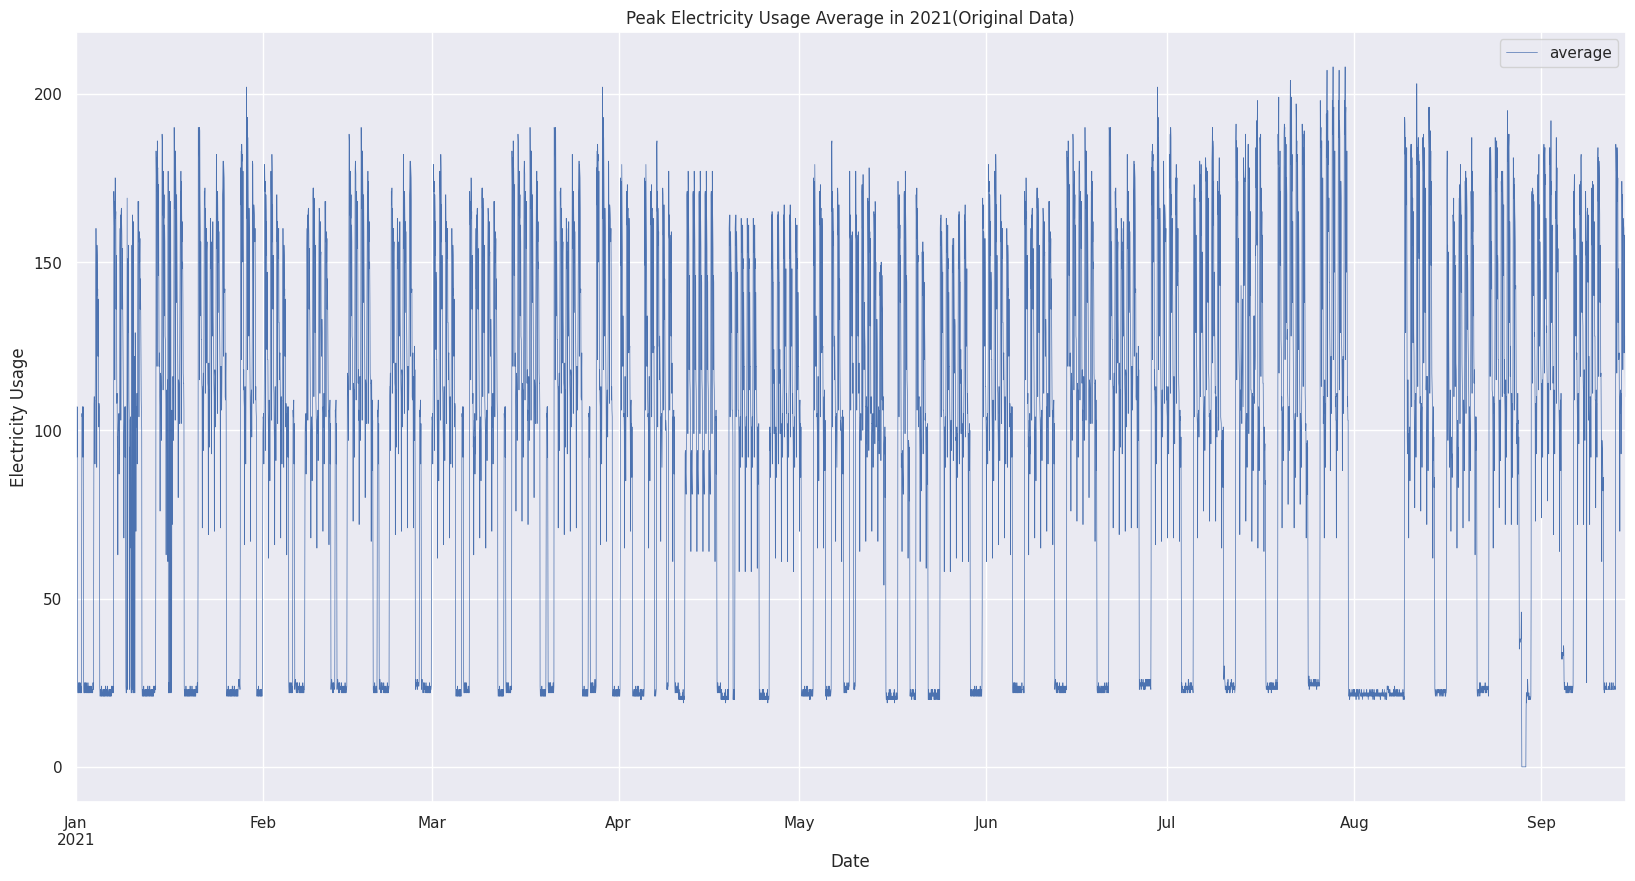

In [14]:
# Line Chart
sns.set(rc = {"figure.figsize": (20, 10)})

df_peaks_usage.plot(linewidth = 0.5);
plt.title("Peak Electricity Usage Average in 2021(Original Data)")
plt.ylabel("Electricity Usage")
plt.show()

<ipython-input-16-44794168e43c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_monthly_time['afternoon/morning'] = df2_monthly_time['hour'].apply(lambda x: 'morning' if 0 <= x <12 else ('afternoon' if 12<=x<24 else None))
<ipython-input-16-44794168e43c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_monthly_time['Month'] = df2_monthly_time.index.month


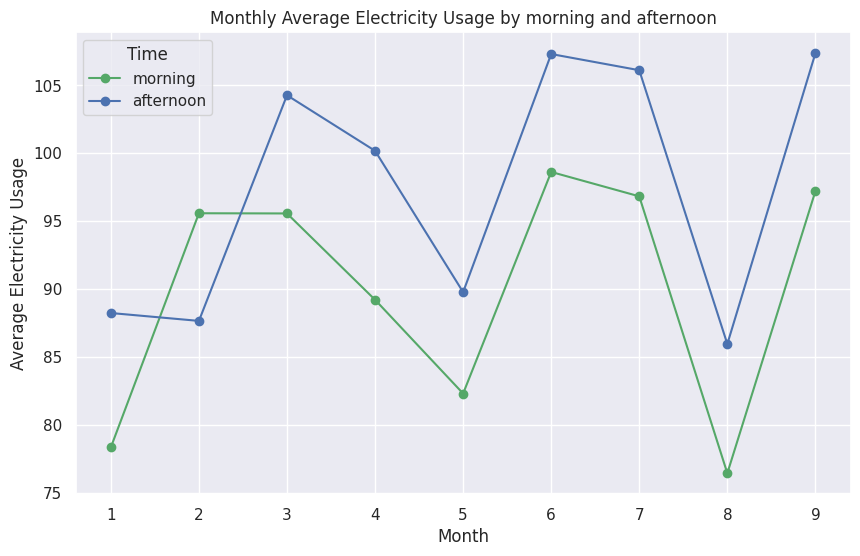

In [16]:
df2_monthly_time = df2[['date', 'hour', 'average']]
df2_monthly_time.index = index_column
df2_monthly_time.index.names = ['Date']
df2_monthly_time['afternoon/morning'] = df2_monthly_time['hour'].apply(lambda x: 'morning' if 0 <= x <12 else ('afternoon' if 12<=x<24 else None))
df2_monthly_time['Month'] = df2_monthly_time.index.month
df2_monthly_time_pivot_table = df2_monthly_time.pivot_table(values='average', index='Month', columns='afternoon/morning', aggfunc='mean')
df2_monthly_time_pivot_table.columns = ['afternoon', 'morning']
plt.figure(figsize=(10, 6))
plt.plot(df2_monthly_time_pivot_table.index, df2_monthly_time_pivot_table['morning'], marker='o', color='g', label='morning')
plt.plot(df2_monthly_time_pivot_table.index, df2_monthly_time_pivot_table['afternoon'], marker='o', color='b', label='afternoon')
plt.title("Monthly Average Electricity Usage by morning and afternoon")
plt.xlabel("Month")
plt.ylabel("Average Electricity Usage")
plt.legend(title="Time")
plt.grid(True)
plt.show()



---



<ipython-input-16-037724403fe4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peaks_usage['Month'] = df_peaks_usage.index.month
<ipython-input-16-037724403fe4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peaks_usage['average_normalized'] = mm_scaler.fit_transform(df_peaks_usage[['average']])


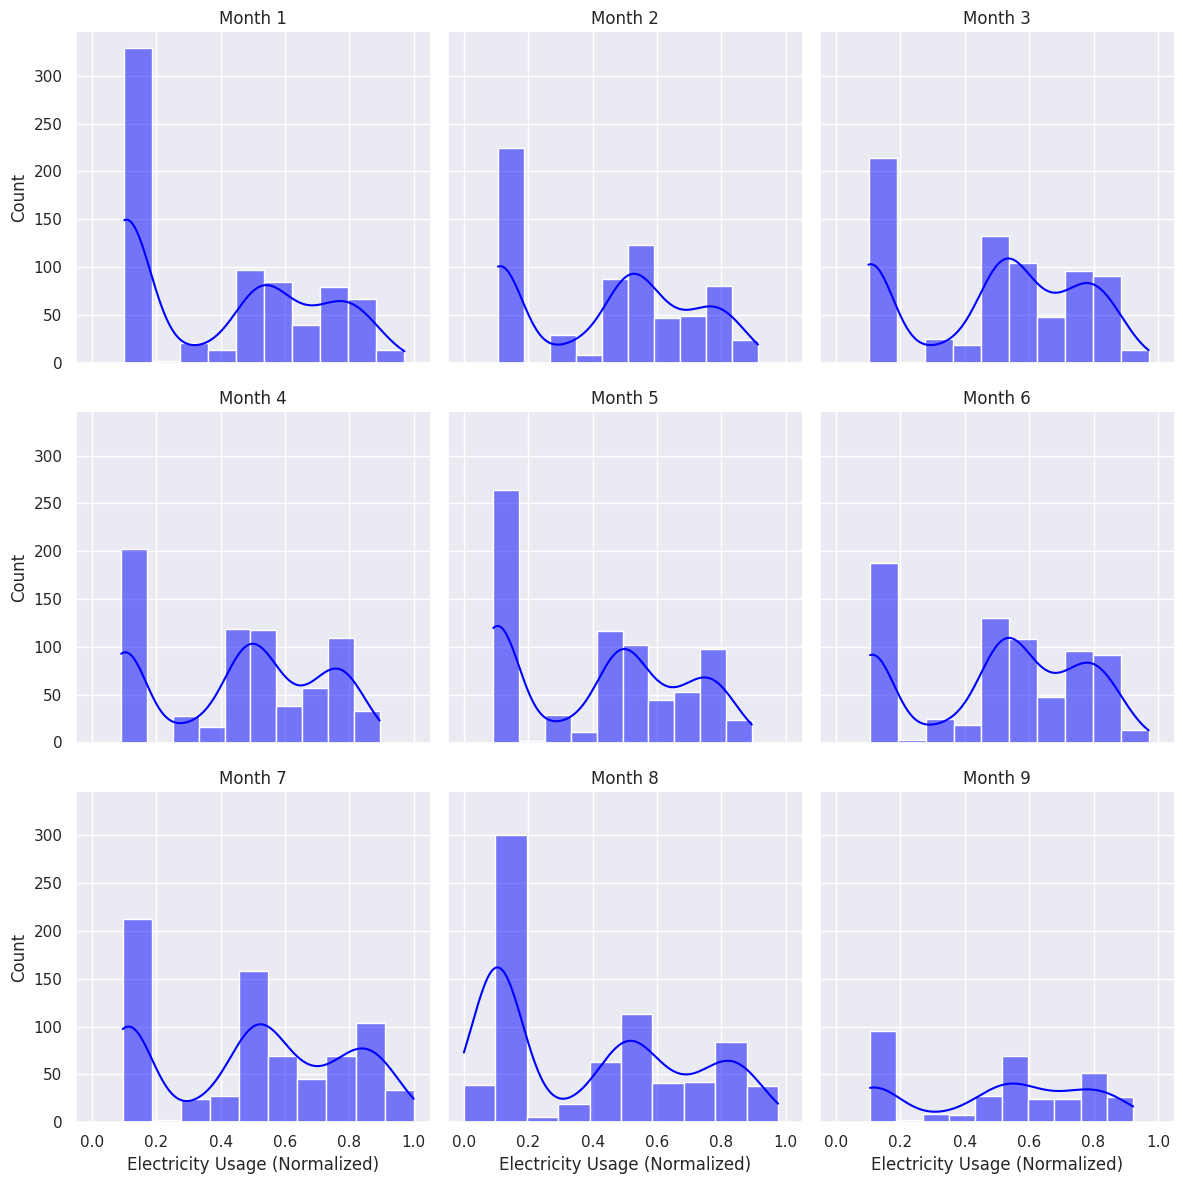

In [ ]:
# Add Month
df_peaks_usage['Month'] = df_peaks_usage.index.month

# Apply scaling to X_train
mm_scaler = MinMaxScaler()

# Apply normalization
df_peaks_usage['average_normalized'] = mm_scaler.fit_transform(df_peaks_usage[['average']])

# Visualize the normalized data
g = sns.FacetGrid(df_peaks_usage, col='Month', col_wrap=3, sharex=True, sharey=True, height=4)
g.map(sns.histplot, 'average_normalized', bins=10, kde=True, color='blue')

g.set_titles("Month {col_name}")
g.set_axis_labels("Electricity Usage (Normalized)", "Count")
g.tight_layout()
plt.show()



---



<ipython-input-17-a3d134cd6fb0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peaks_usage['Hour'] = df_peaks_usage.index.hour
<ipython-input-17-a3d134cd6fb0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peaks_usage['average_normalized'] = mm_scaler.fit_transform(df_peaks_usage[['average']])


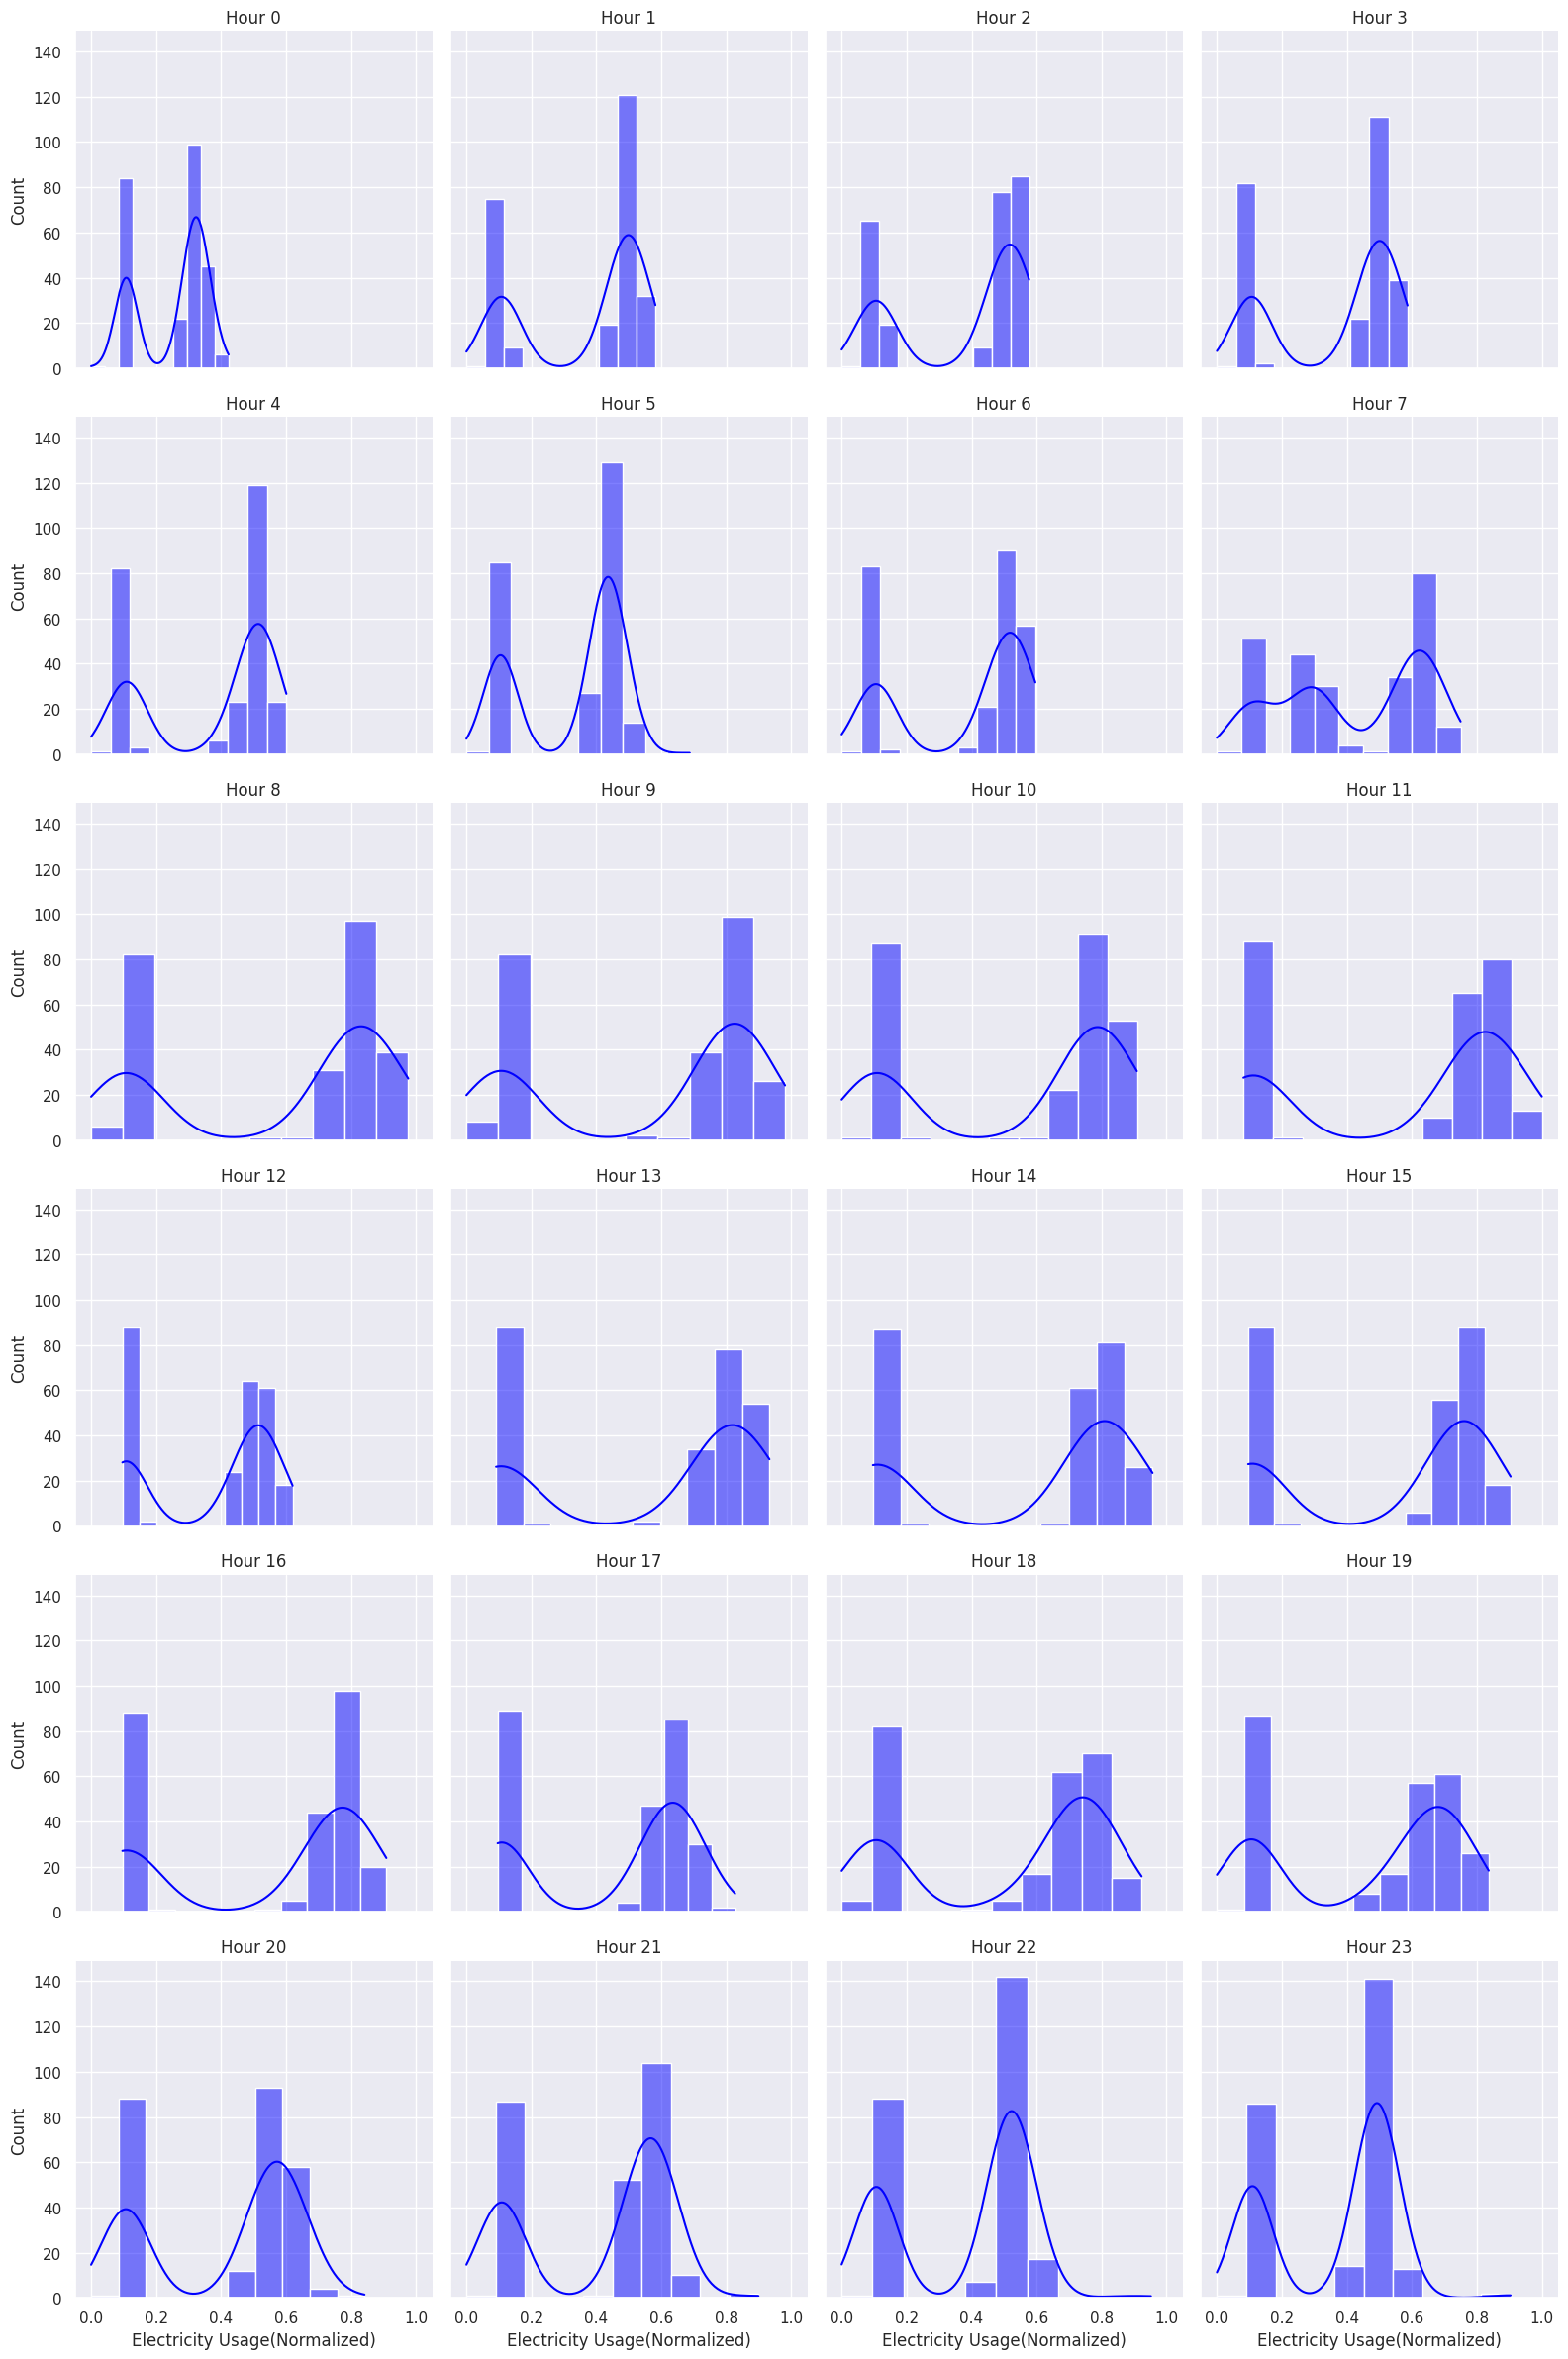

In [ ]:
# Add Hour
df_peaks_usage['Hour'] = df_peaks_usage.index.hour

# Apply scaling to X_train
mm_scaler = MinMaxScaler()

# Apply normalization
df_peaks_usage['average_normalized'] = mm_scaler.fit_transform(df_peaks_usage[['average']])

# Visualize the normalized data
g = sns.FacetGrid(df_peaks_usage, col='Hour', col_wrap=4, sharex=True, sharey=True, height=4)
g.map(sns.histplot, 'average_normalized', bins=10, kde=True, color='blue')

g.set_titles("Hour {col_name}")
g.set_axis_labels("Electricity Usage(Normalized)", "Count")
g.tight_layout()
plt.show()



---



In [ ]:
df_peaks_usage_wk = df_c[['average', 'day']]
df_peaks_usage_wk.index = index_column
df_peaks_usage_wk.index.names = ['Date']
df_peaks_usage_wk['average'] = [float(str(val).replace('.','').replace(',','.')) for val in df_peaks_usage_wk['average'].values]
df_peaks_usage_wk.head()

<ipython-input-18-cd194a2ab795>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peaks_usage_wk['average'] = [float(str(val).replace('.','').replace(',','.')) for val in df_peaks_usage_wk['average'].values]


,average,day
Date,,
2021-01-01 00:00:00,61.0,5
2021-01-01 01:00:00,105.0,5
2021-01-01 02:00:00,104.0,5
2021-01-01 03:00:00,105.0,5
2021-01-01 04:00:00,107.0,5


<ipython-input-19-5afa824fd530>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peaks_usage_wk['average_normalized'] = mm_scaler.fit_transform(df_peaks_usage_wk[['average']])
<ipython-input-19-5afa824fd530>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peaks_usage_wk['weekday_type'] = df_peaks_usage_wk['day'].apply(


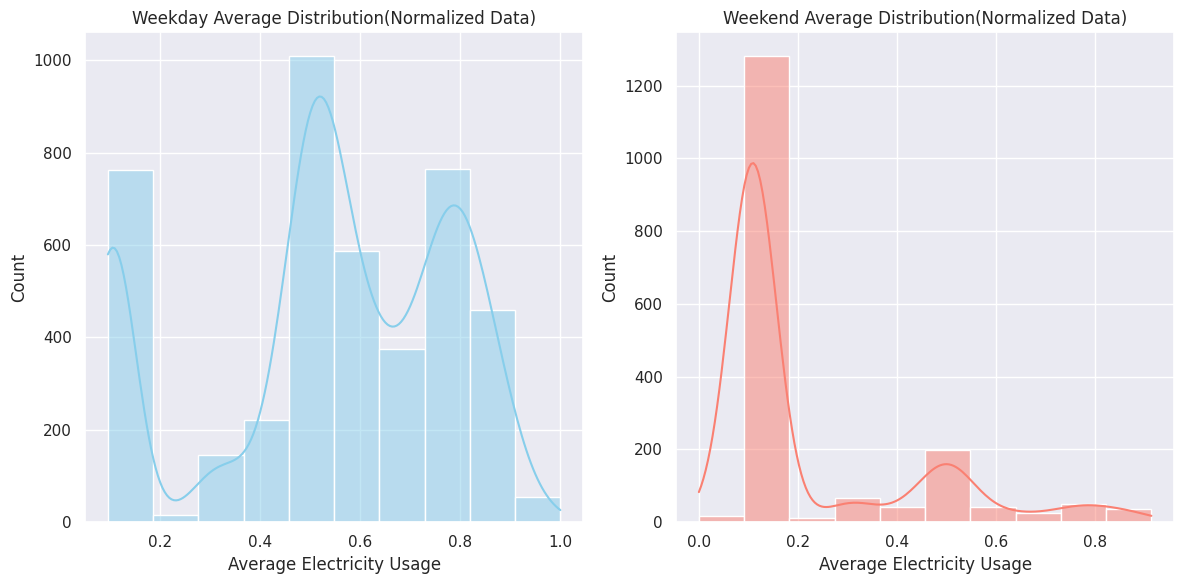

In [ ]:
# Apply scaling to X_train
mm_scaler = MinMaxScaler()

# Apply normalization
df_peaks_usage_wk['average_normalized'] = mm_scaler.fit_transform(df_peaks_usage_wk[['average']])

# Separate Weekday(1~5) and Weekend(6, 7)
df_peaks_usage_wk['weekday_type'] = df_peaks_usage_wk['day'].apply(
    lambda x: 'Weekday' if x <= 5 else 'Weekend'
)

# Visualize the normalized data
plt.figure(figsize=(12, 6))

# Weekday Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=df_peaks_usage_wk[df_peaks_usage_wk['weekday_type'] == 'Weekday'],
             x='average_normalized', bins=10, kde=True, color='skyblue')
plt.title('Weekday Average Distribution(Normalized Data)')
plt.xlabel('Average Electricity Usage')
plt.ylabel('Count')

# Weekend Histogram
plt.subplot(1, 2, 2)
sns.histplot(data=df_peaks_usage_wk[df_peaks_usage_wk['weekday_type'] == 'Weekend'],
             x='average_normalized', bins=10, kde=True, color='salmon')
plt.title('Weekend Average Distribution(Normalized Data)')
plt.xlabel('Average Electricity Usage')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

**Interpretation**

* When examining the original data for `Date` and `Hour`, only in February does morning electricity consumption surpass afternoon consumption. However, it was difficult to identify any discernible patterns. Therefore, criteria were defined to normalize the data, and the data distribution was analyzed accordingly.
1. Monthly Distribution
  * In most months, the average electricity usage is concentrated in the 0.2 to 0.4 range.
  * For January, May, and August, the data is densely clustered in the lower usage range (0.2), showing a relatively distinct difference compared to other months.
  * For June and September, the data is more evenly distributed compared to other months.


2. Time Distribution
  * In most time periods, the average power usage is concentrated in the 0.4 to 0.6 range.
  * Midnight to early morning (0:00 to 6:00): Data is concentrated in the 0.4 to 0.6 range, with no observations below 0.2 or above 0.8.
  * Morning (7:00 to 9:00): An increase in data below 0.2 and in the 0.6 to 0.8 range is observed.
  * Daytime (10:00 to 16:00): Similar to the morning, there is an increase in data below 0.2 and in the 0.6 to 0.8 range.
  * Evening (17:00 to 23:00): Data is concentrated in the 0.4 to 0.6 range.

3. Weekday/Weekend Distribution
  * On weekdays, data is mostly distributed in the 0.4 to 0.6 range and is more evenly spread compared to weekends.
  * On weekends, data is densely clustered in the lower usage range (0.2).
  * On weekdays, electricity usage is likely higher due to factory operations and work activities, whereas on weekends, reduced work activities may have led to a decrease in electricity usage.



### **3) Peak Electricity Usage**

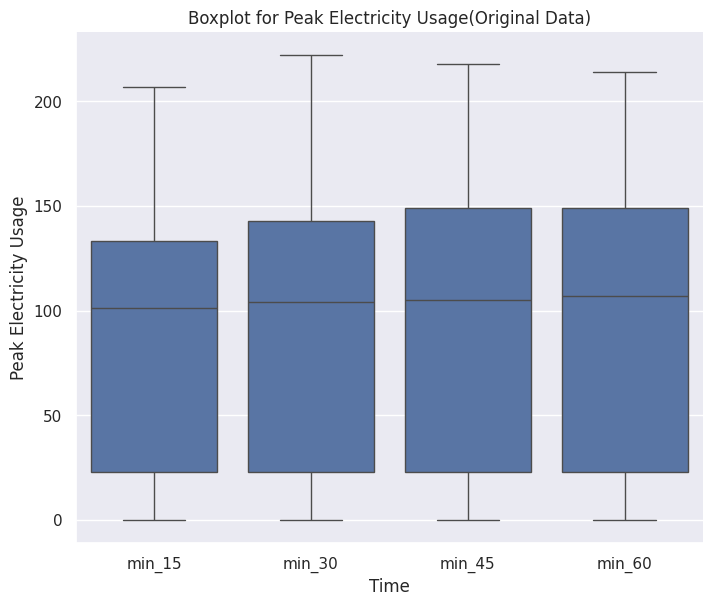

In [ ]:
peak_usage_columns = ['min_15', 'min_30', 'min_45', 'min_60']
df_c_peaks_usage = df_c[peak_usage_columns].melt(var_name="Time", value_name="Peak Electricity Usage")

sns.catplot(data=df_c_peaks_usage, x="Time", y="Peak Electricity Usage", kind="box", height=6, aspect=1.2)
plt.title("Boxplot for Peak Electricity Usage(Original Data)")
plt.ylabel("Peak Electricity Usage")
plt.show()

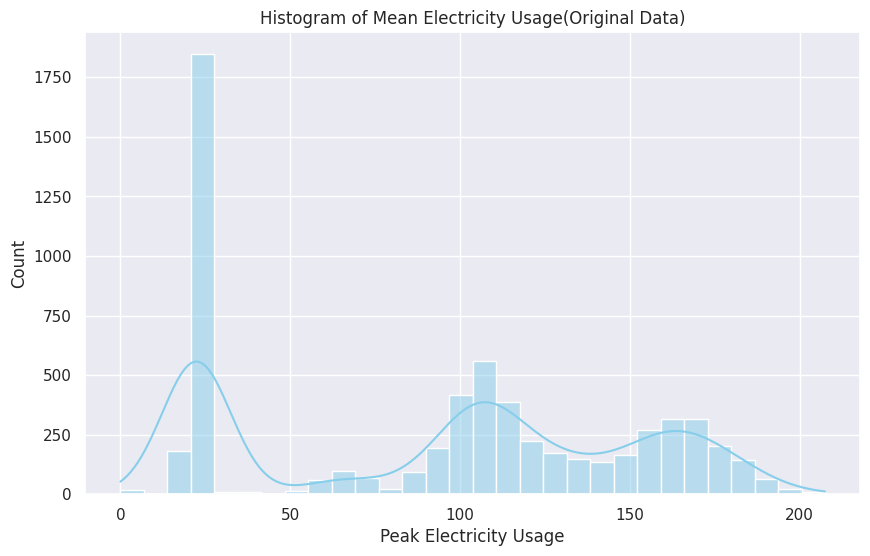

In [ ]:
df['useage_mean'] = df_c[peak_usage_columns].mean(axis=1)

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='useage_mean', bins=30, kde=True, color='skyblue')
plt.title("Histogram of Mean Electricity Usage(Original Data)")
plt.xlabel("Peak Electricity Usage")
plt.ylabel("Count")
plt.show()

<ipython-input-22-173359e01e4a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['hour'] = df3.index.hour
<ipython-input-22-173359e01e4a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['month'] = df3.index.month
<ipython-input-22-173359e01e4a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

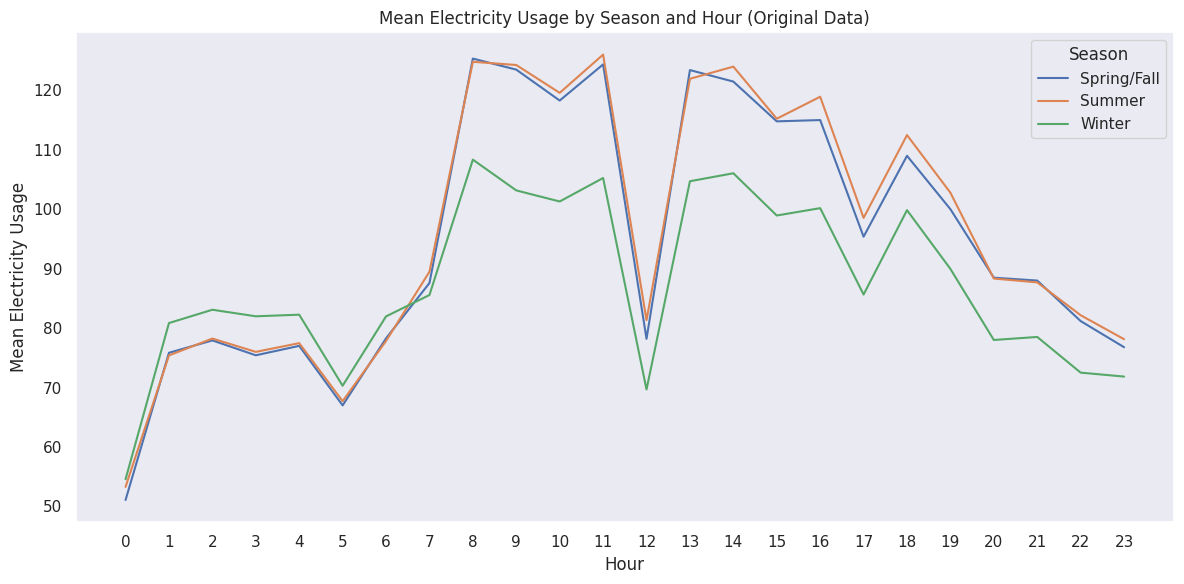

In [ ]:
df3 = df_c[['average']]
df3.index = index_column
df3.index.names = ['Date']

df3['hour'] = df3.index.hour
df3['month'] = df3.index.month
df3['season'] = df3['month'].apply(classify_season)

# Group by season and hour, calculate the mean of 'average'
df_grouped = df3.groupby(['season', 'hour'])['average'].mean().reset_index()

# Pivot the grouped data for plotting
df_pivot = df_grouped.pivot(index='hour', columns='season', values='average')

plt.figure(figsize=(12, 6))
for season in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[season], label=season)

plt.title("Mean Electricity Usage by Season and Hour (Original Data)")
plt.xticks(ticks=df_pivot.index, labels=df_pivot.index)
plt.xlabel("Hour")
plt.ylabel("Mean Electricity Usage")
plt.legend(title="Season")
plt.grid()

plt.tight_layout()
plt.show()



---



In [ ]:
# Apply scaling to X_train
mm_scaler = MinMaxScaler()

# Apply normalization
df_normalized = pd.DataFrame(
    mm_scaler.fit_transform(df_c[peak_usage_columns]),
    columns=[f"{col}_normalized" for col in peak_usage_columns]
)

# Combine original and normalized data
df_combined = pd.concat([df_c, df_normalized], axis=1)

In [ ]:
df_combined.head()

,date,hour,min_15,min_30,min_45,min_60,average,production,temperature,electricity_cost,day,m,factory_staff,labor_cost,min_15_normalized,min_30_normalized,min_45_normalized,min_60_normalized
0,20210101,0,62,61,61,61,61,0,-3.2,109.8,5,1,0.0,1.5,0.299517,0.274775,0.279817,0.285047
1,20210101,1,96,93,116,113,105,0,-4.5,109.8,5,1,0.0,1.5,0.463768,0.418919,0.532110,0.528037
2,20210101,2,106,96,106,107,104,0,-3.9,109.8,5,1,0.0,1.5,0.512077,0.432432,0.486239,0.500000
3,20210101,3,92,110,110,109,105,0,-4.1,109.8,5,1,0.0,1.5,0.444444,0.495495,0.504587,0.509346
4,20210101,4,108,105,106,108,107,0,-4.6,109.8,5,1,0.0,1.5,0.521739,0.472973,0.486239,0.504673


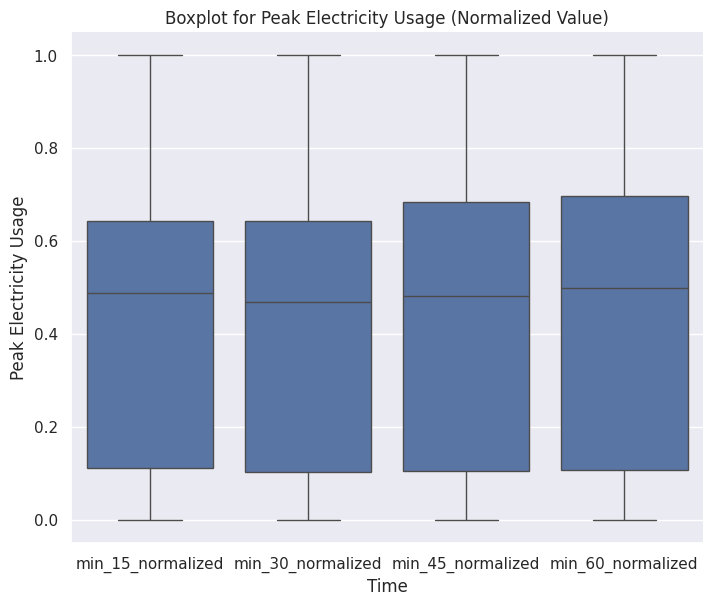

In [ ]:
peak_usage_normalized = ['min_15_normalized', 'min_30_normalized', 'min_45_normalized', 'min_60_normalized']
df_peaks_normalized = df_combined[peak_usage_normalized].melt(var_name="Time", value_name="Peak Electricity Usage")

sns.catplot(data=df_peaks_normalized, x="Time", y="Peak Electricity Usage", kind="box", height=6, aspect=1.2)
plt.title("Boxplot for Peak Electricity Usage (Normalized Value)")
plt.ylabel("Peak Electricity Usage")
plt.show()

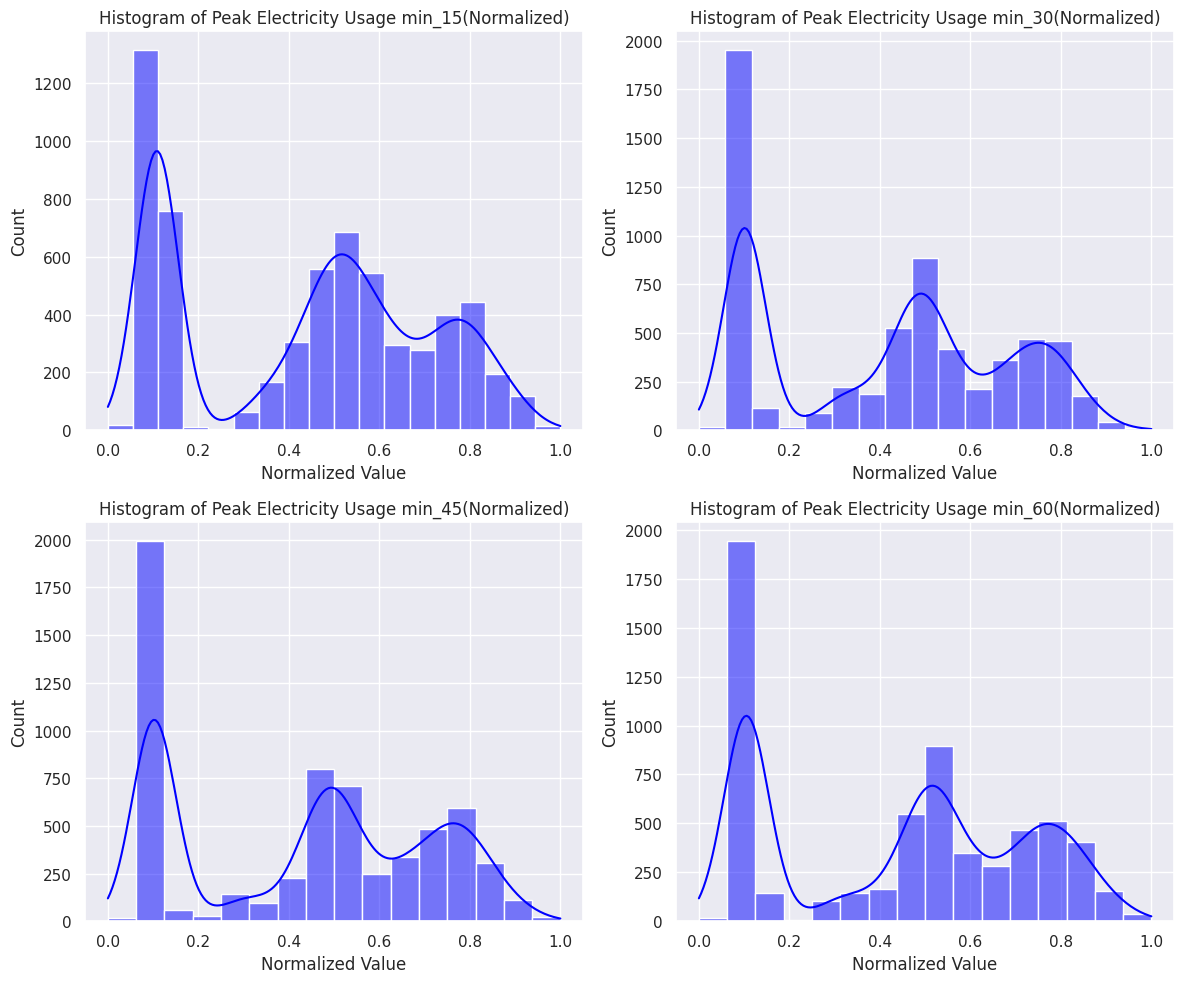

In [ ]:
# Visualize the normalized data
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
for i, col in enumerate(peak_usage_columns):
    sns.histplot(data=df_combined, x=f"{col}_normalized", ax=axes[i // 2, i % 2], kde=True, color='blue')
    axes[i // 2, i % 2].set_title(f"Histogram of Peak Electricity Usage {col}(Normalized)")
    axes[i // 2, i % 2].set_xlabel("Normalized Value")
    axes[i // 2, i % 2].set_ylabel("Count")

plt.tight_layout()
plt.show()

**Interpretation**

* Summer and Winter: Electricity usage increased during specific time periods due to cooling and heating needs, respectively.
* Spring and Fall: These seasons appear to coincide with longer factory operating hours or heightened production activities, resulting in generally higher electricity usage across the seasons.
* Normalization
  * After applying Min-Max normalization, most variables were found to be concentrated below 0.2.
  * Data above 0.8 was relatively rare, indicating that cases of high electricity usage are uncommon.

### **4) Production**

In [ ]:
df_production = df_c[['production']]
df_production.index = index_column
df_production.index.names = ['Date']
df_production.head()

,production
Date,
2021-01-01 00:00:00,0
2021-01-01 01:00:00,0
2021-01-01 02:00:00,0
2021-01-01 03:00:00,0
2021-01-01 04:00:00,0


In [ ]:
df_production['production'] = [float(str(val).replace('.','').replace(',','.')) for val in df_production['production'].values]
df_production.head()

<ipython-input-26-91b8fed7aebc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_production['production'] = [float(str(val).replace('.','').replace(',','.')) for val in df_production['production'].values]


,production
Date,
2021-01-01 00:00:00,0.0
2021-01-01 01:00:00,0.0
2021-01-01 02:00:00,0.0
2021-01-01 03:00:00,0.0
2021-01-01 04:00:00,0.0


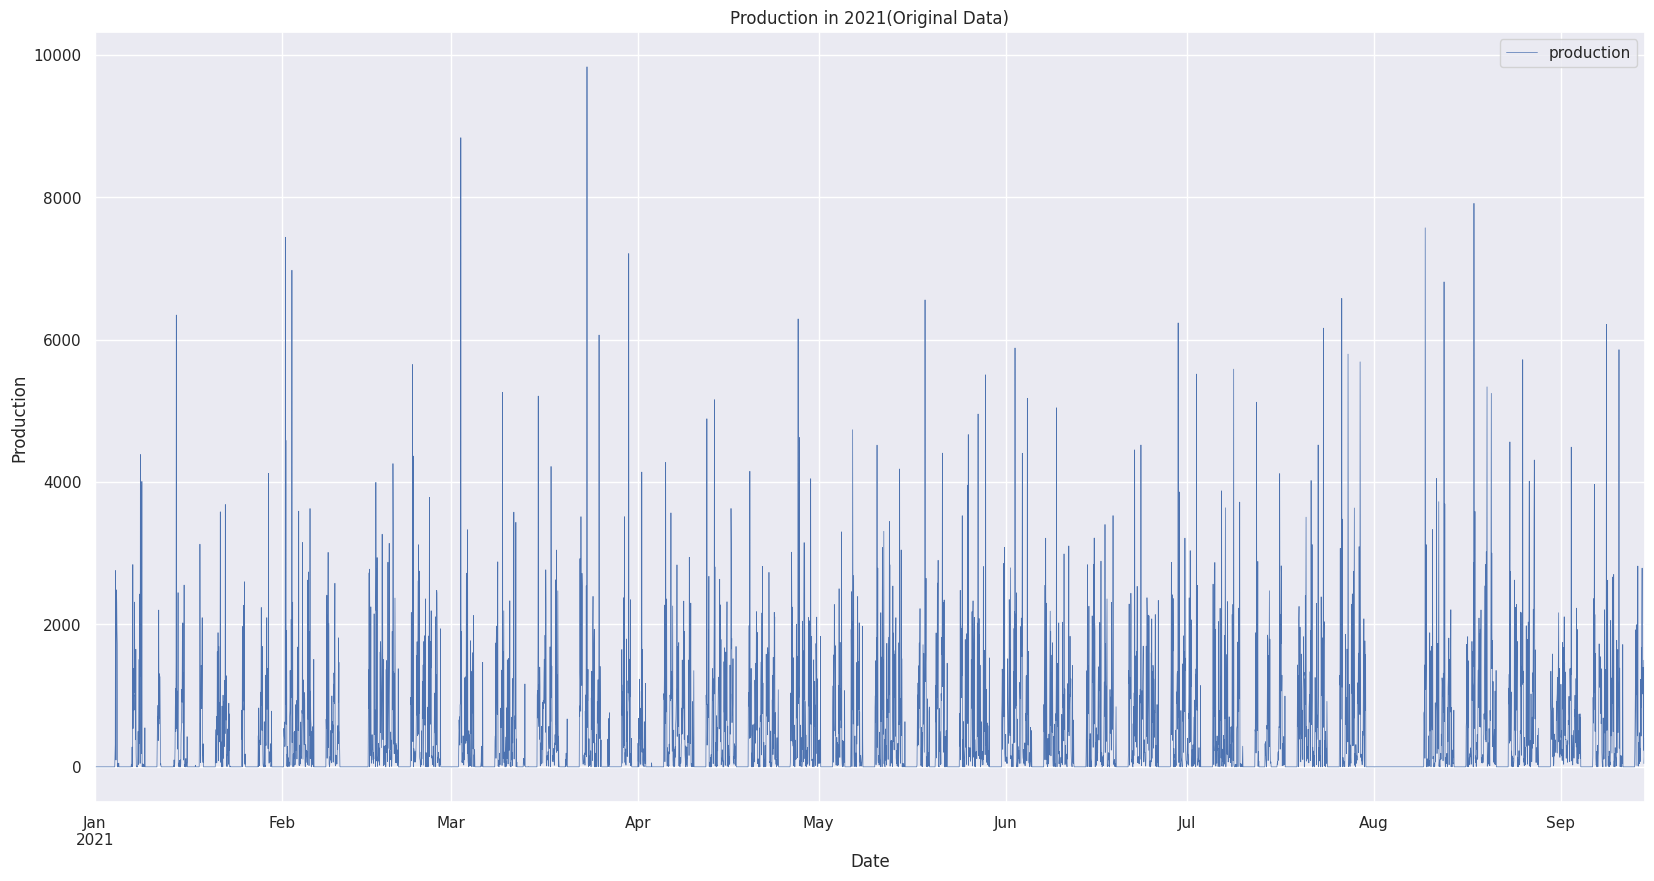

In [ ]:
# Line Chart
sns.set(rc = {"figure.figsize": (20, 10)})

df_production.plot(linewidth = 0.5);
plt.title("Production in 2021(Original Data)")
plt.ylabel("Production")
plt.show()

<ipython-input-28-16938d1685aa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c_monthly_production['Weekday/Weekend'] = df_c_monthly_production.index.to_series().apply(lambda x: 'Weekend' if x.weekday() >= 5 else 'Weekday')
<ipython-input-28-16938d1685aa>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c_monthly_production['month'] = df_c_monthly_production.index.to_period('M')


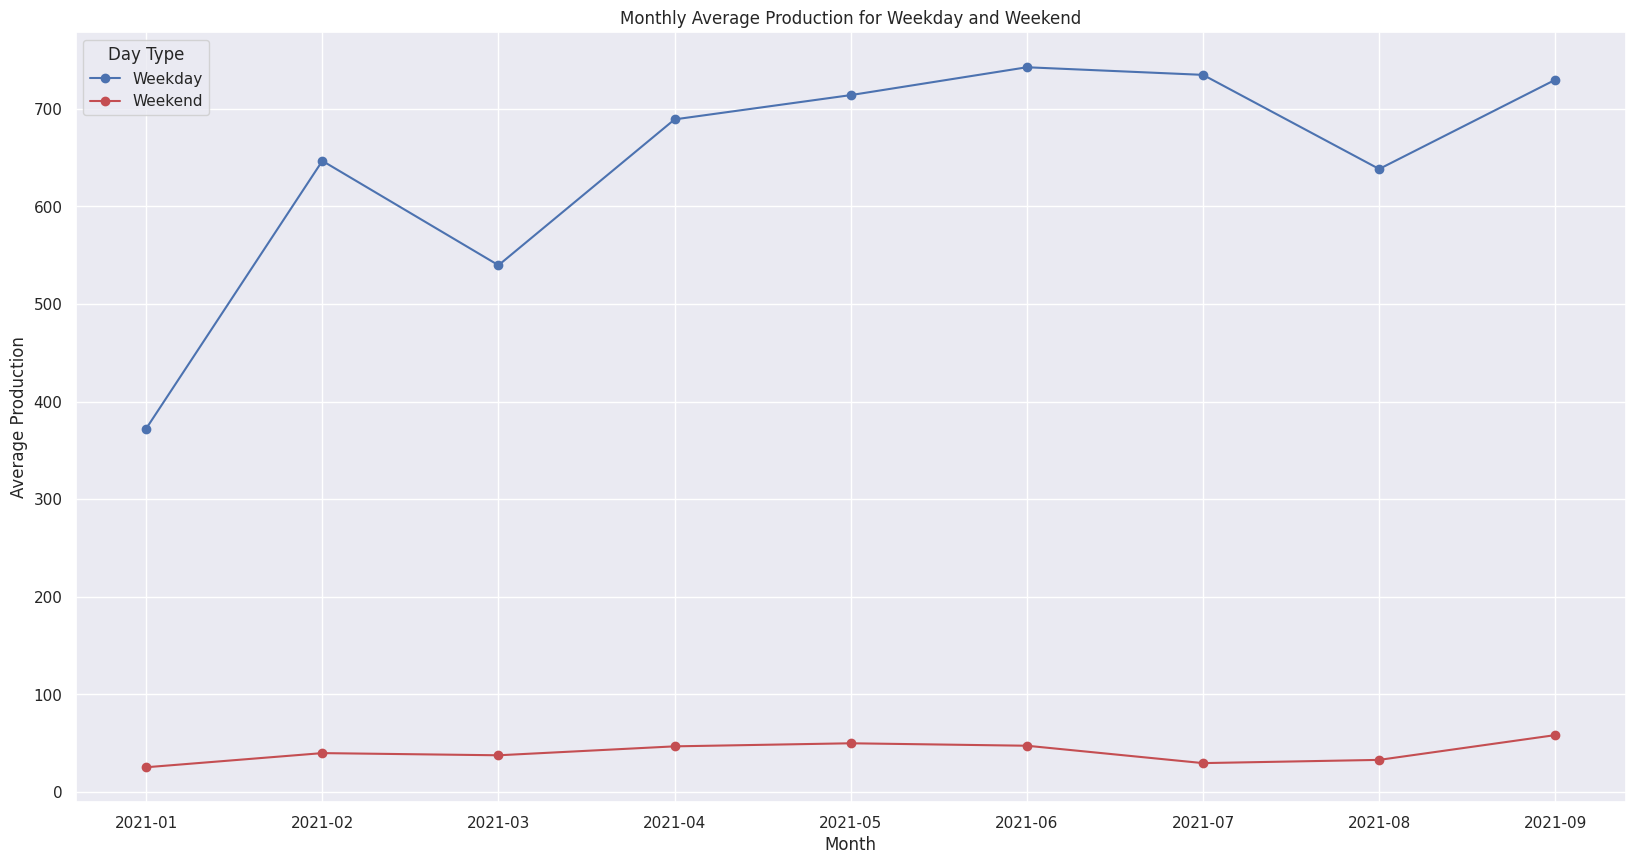

In [ ]:
df_c_monthly_production = df_c[['production', 'm']]
df_c_monthly_production.index = index_column
df_c_monthly_production.index.names = ['Date']
df_c_monthly_production

df_c_monthly_production['Weekday/Weekend'] = df_c_monthly_production.index.to_series().apply(lambda x: 'Weekend' if x.weekday() >= 5 else 'Weekday')
df_c_monthly_production['month'] = df_c_monthly_production.index.to_period('M')
df_c_monthly_average_production = df_c_monthly_production.pivot_table(values='production', index='month', columns='Weekday/Weekend', aggfunc='mean')

df_c_monthly_average_production

sns.set(rc={"figure.figsize": (20, 10)})
plt.plot(df_c_monthly_average_production.index.astype(str), df_c_monthly_average_production['Weekday'], marker='o', color='b', label='Weekday')
plt.plot(df_c_monthly_average_production.index.astype(str), df_c_monthly_average_production['Weekend'], marker='o', color='r', label='Weekend')

plt.title("Monthly Average Production for Weekday and Weekend")
plt.xlabel("Month")
plt.ylabel("Average Production")
plt.legend(title="Day Type")
plt.show()

In [ ]:
df_season_production = df_c[['production', 'm']]
df_season_production['season'] = df_season_production['m'].apply(classify_season)
df_season_production.head()

<ipython-input-29-8d922d78a121>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_season_production['season'] = df_season_production['m'].apply(classify_season)


,production,m,season
0,0,1,Winter
1,0,1,Winter
2,0,1,Winter
3,0,1,Winter
4,0,1,Winter


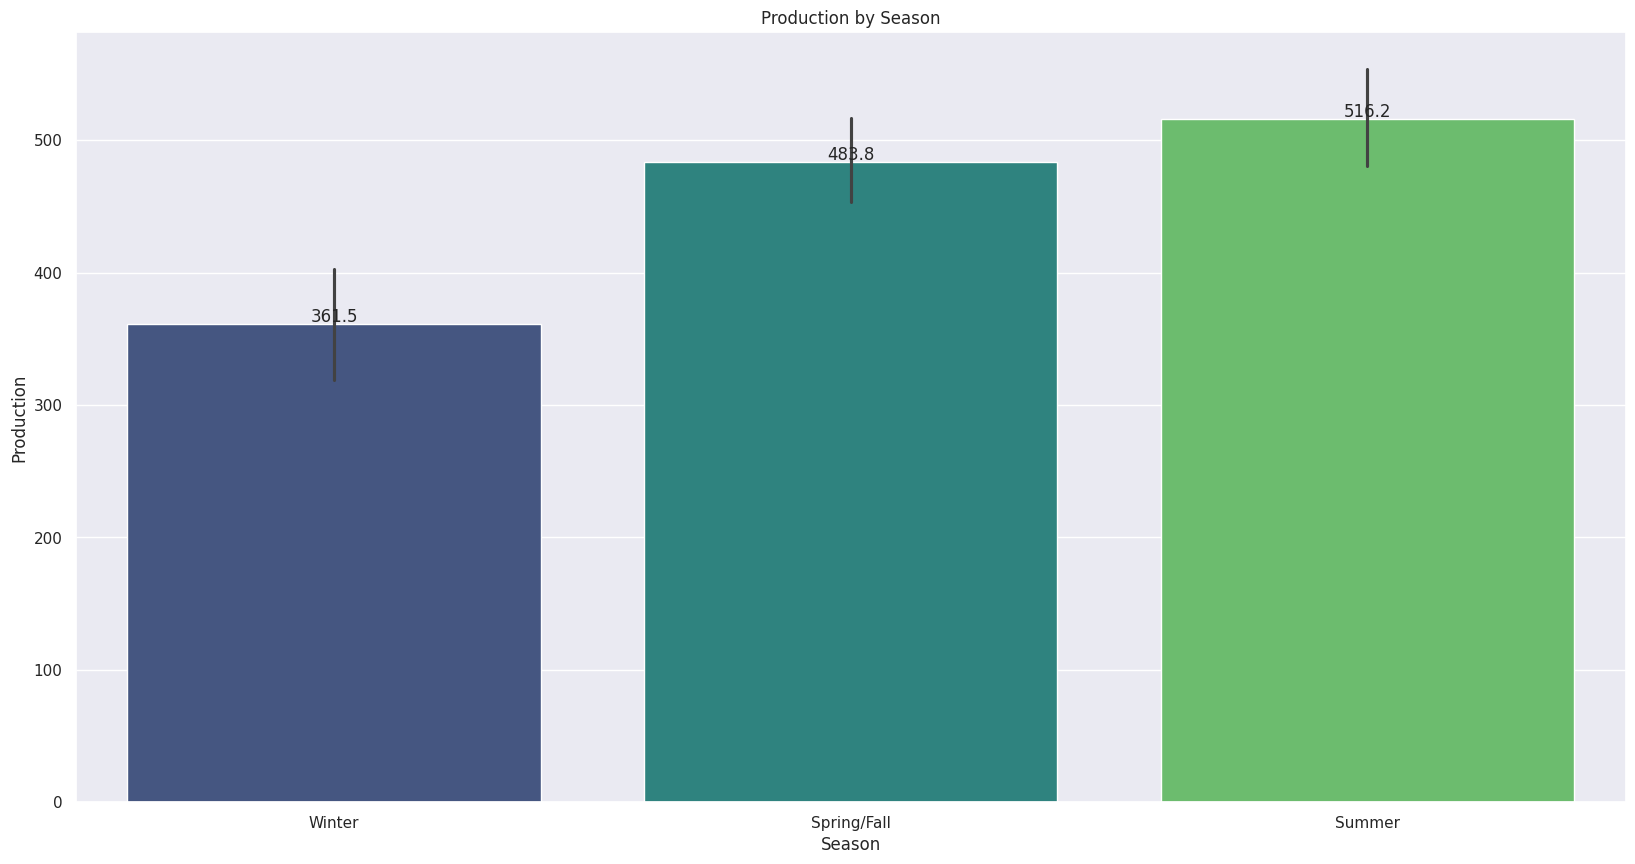

In [ ]:
# Production by Season
ax = sns.barplot(data=df_season_production, x='season', y='production', hue='season', dodge=False, palette='viridis')
ax.set_title("Production by Season")
ax.set_xlabel("Season")
ax.set_ylabel("Production")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()



---



<ipython-input-31-1c586b491915>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_production['Month'] = df_production.index.month
<ipython-input-31-1c586b491915>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_production['production_normalized'] = mm_scaler.fit_transform(df_production[['production']])


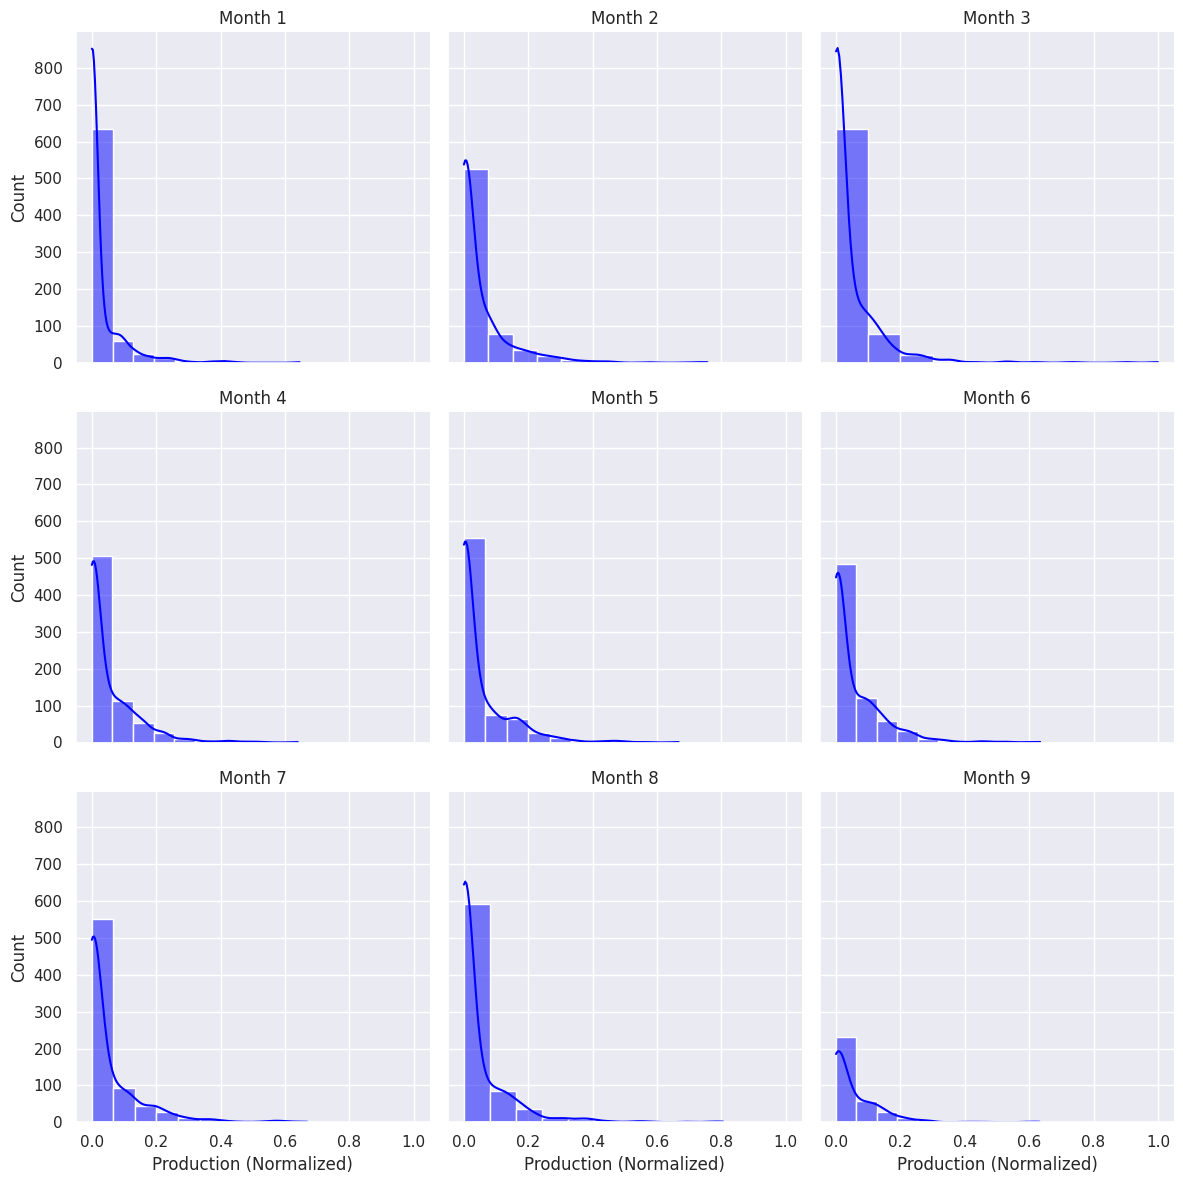

In [ ]:
# Add Month
df_production['Month'] = df_production.index.month

# Apply scaling to X_train
mm_scaler = MinMaxScaler()

# Apply normalization
df_production['production_normalized'] = mm_scaler.fit_transform(df_production[['production']])

# Visualize the normalized data
g = sns.FacetGrid(df_production, col='Month', col_wrap=3, sharex=True, sharey=True, height=4)
g.map(sns.histplot, 'production_normalized', bins=10, kde=True, color='blue')

g.set_titles("Month {col_name}")
g.set_axis_labels("Production (Normalized)", "Count")
g.tight_layout()
plt.show()

<ipython-input-32-cea89b35225b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_production['Hour'] = df_production.index.hour
<ipython-input-32-cea89b35225b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_production['production_normalized'] = mm_scaler.fit_transform(df_production[['production']])


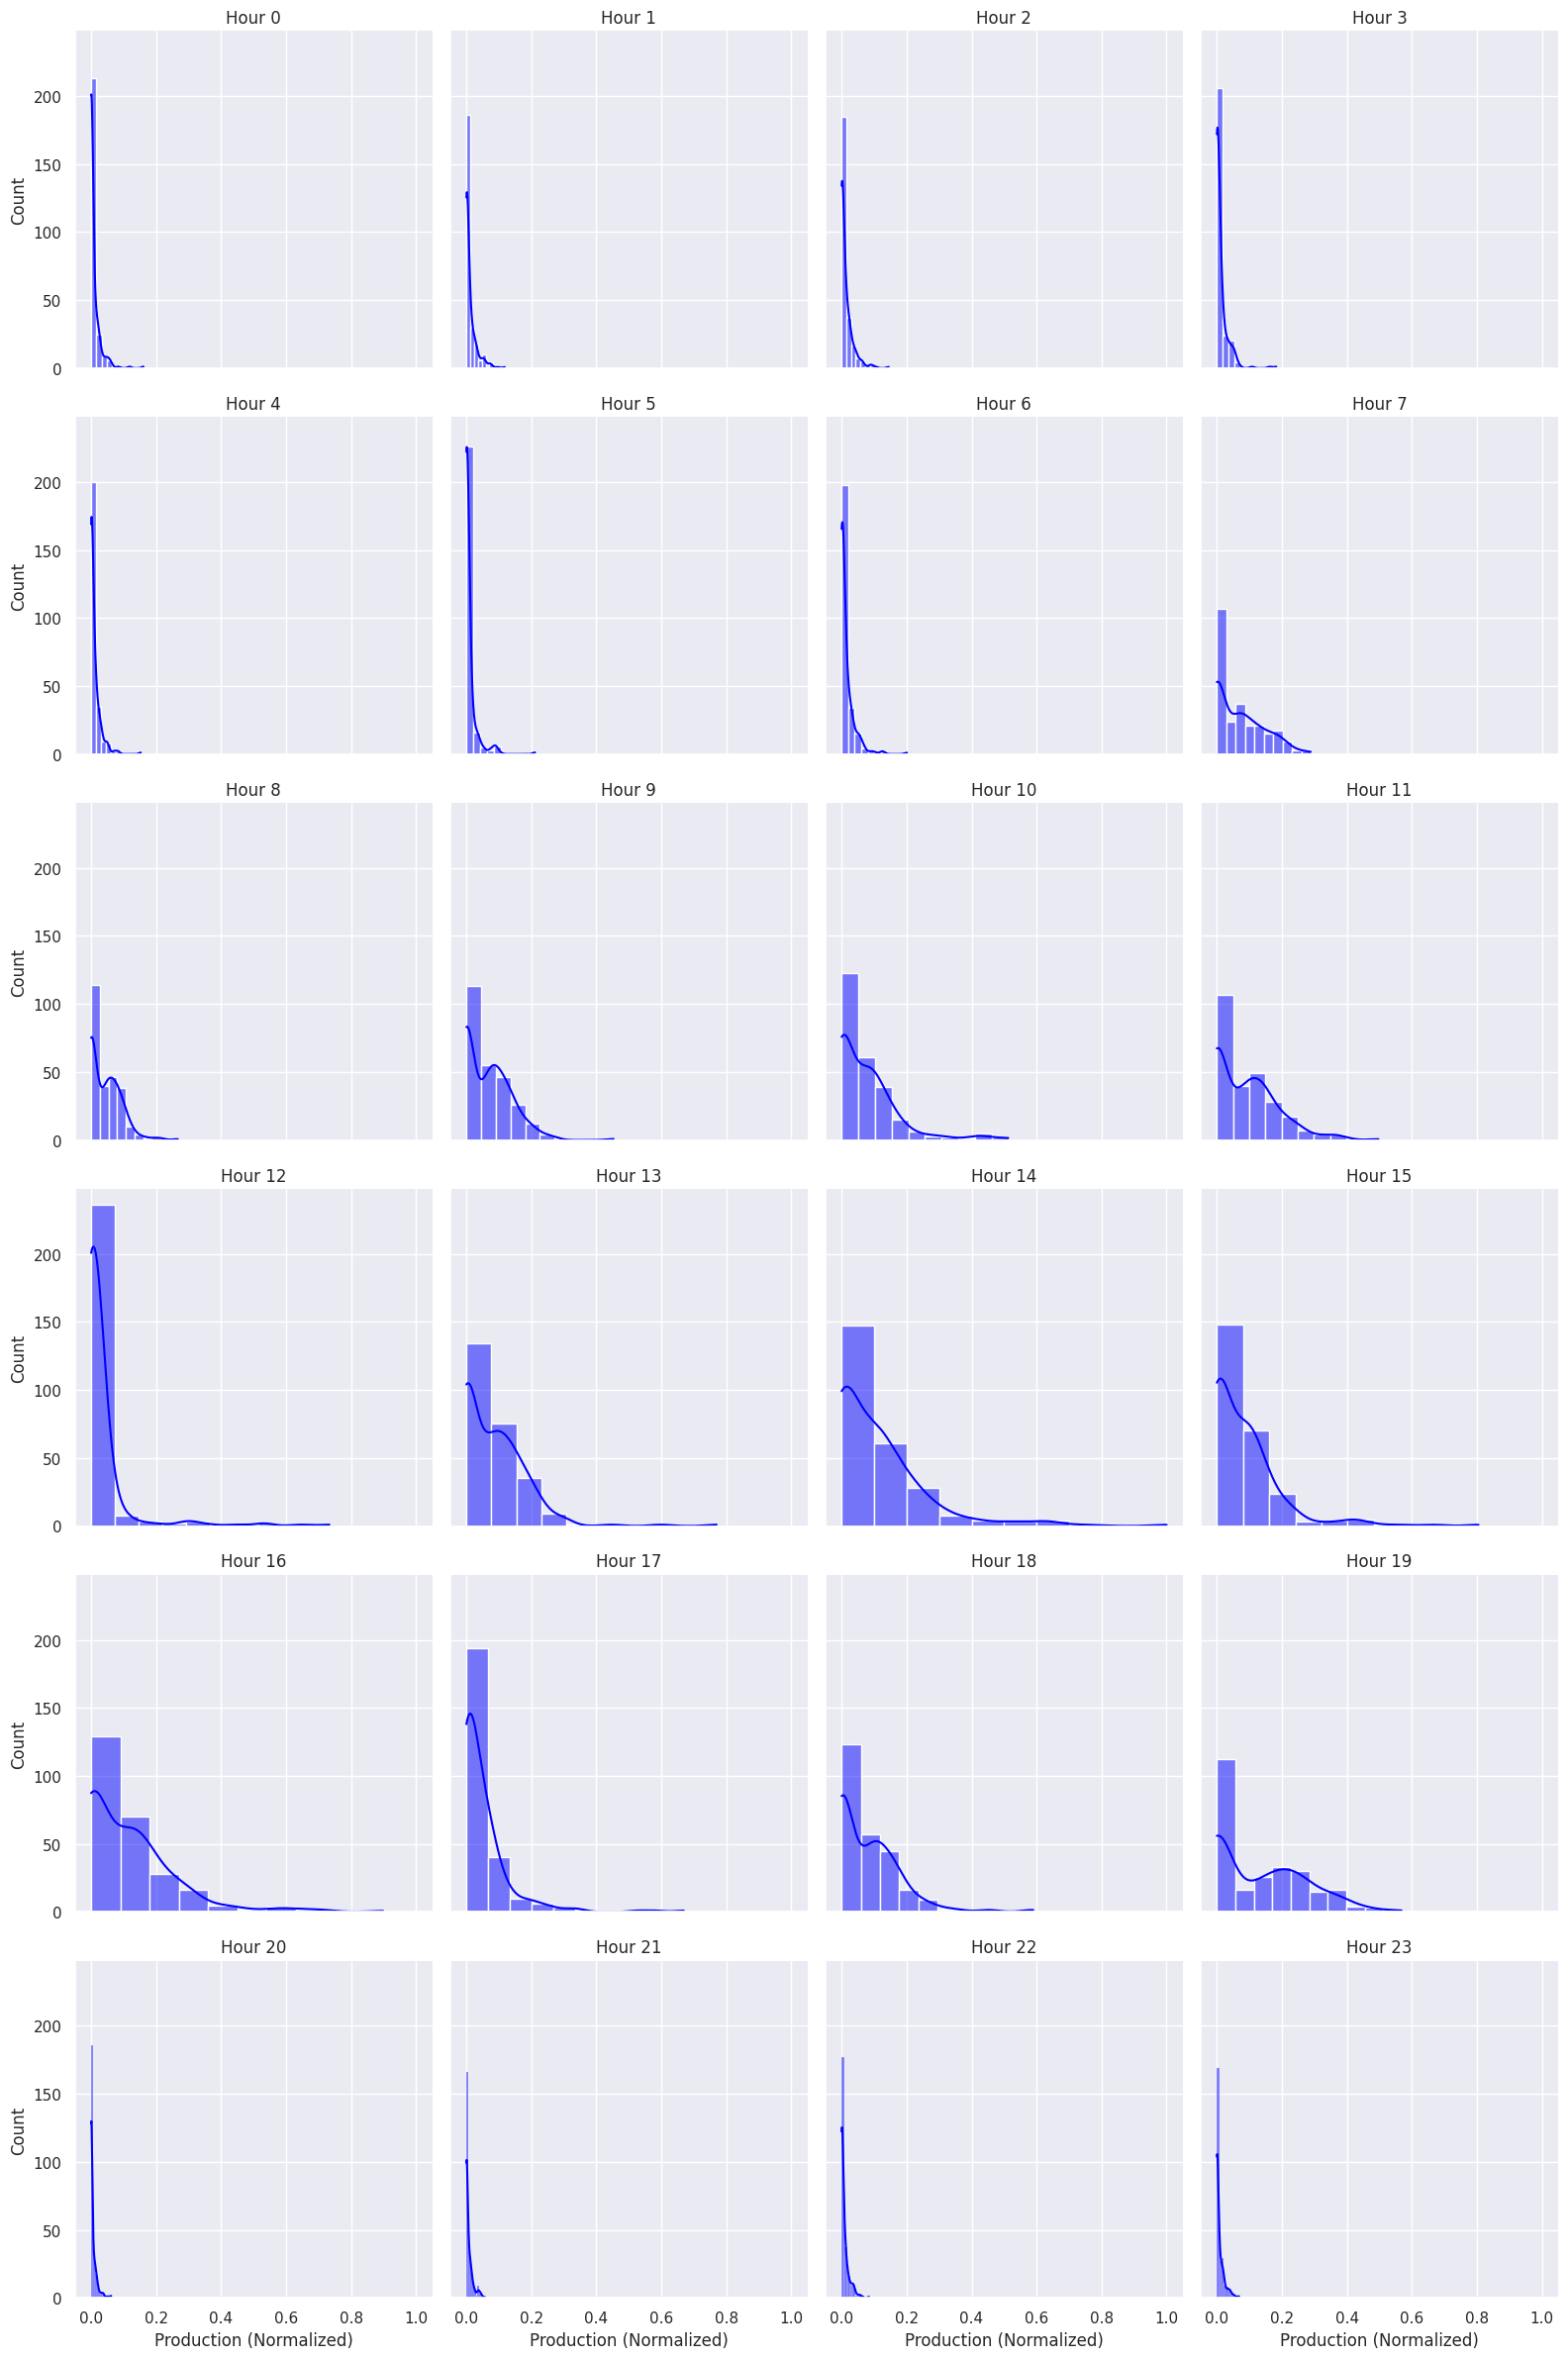

In [ ]:
# Add Hour
df_production['Hour'] = df_production.index.hour

# Apply scaling to X_train
mm_scaler = MinMaxScaler()

# Apply normalization
df_production['production_normalized'] = mm_scaler.fit_transform(df_production[['production']])

# Visualize the normalized data
g = sns.FacetGrid(df_production, col='Hour', col_wrap=4, sharex=True, sharey=True, height=4)
g.map(sns.histplot, 'production_normalized', bins=10, kde=True, color='blue')

g.set_titles("Hour {col_name}")
g.set_axis_labels("Production (Normalized)", "Count")

plt.tight_layout()
plt.show()

In [ ]:
df_production_wk = df_c[['production', 'day']]
df_production_wk.index = index_column
df_production_wk.index.names = ['Date']
df_production_wk['production'] = [float(str(val).replace('.','').replace(',','.')) for val in df_production_wk['production'].values]
df_production_wk.head()

<ipython-input-33-7e432be1394c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_production_wk['production'] = [float(str(val).replace('.','').replace(',','.')) for val in df_production_wk['production'].values]


,production,day
Date,,
2021-01-01 00:00:00,0.0,5
2021-01-01 01:00:00,0.0,5
2021-01-01 02:00:00,0.0,5
2021-01-01 03:00:00,0.0,5
2021-01-01 04:00:00,0.0,5


<ipython-input-34-05406dd8ebb9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_production_wk['production_normalized'] = mm_scaler.fit_transform(df_production_wk[['production']])
<ipython-input-34-05406dd8ebb9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_production_wk['weekday_type'] = df_production_wk['day'].apply(


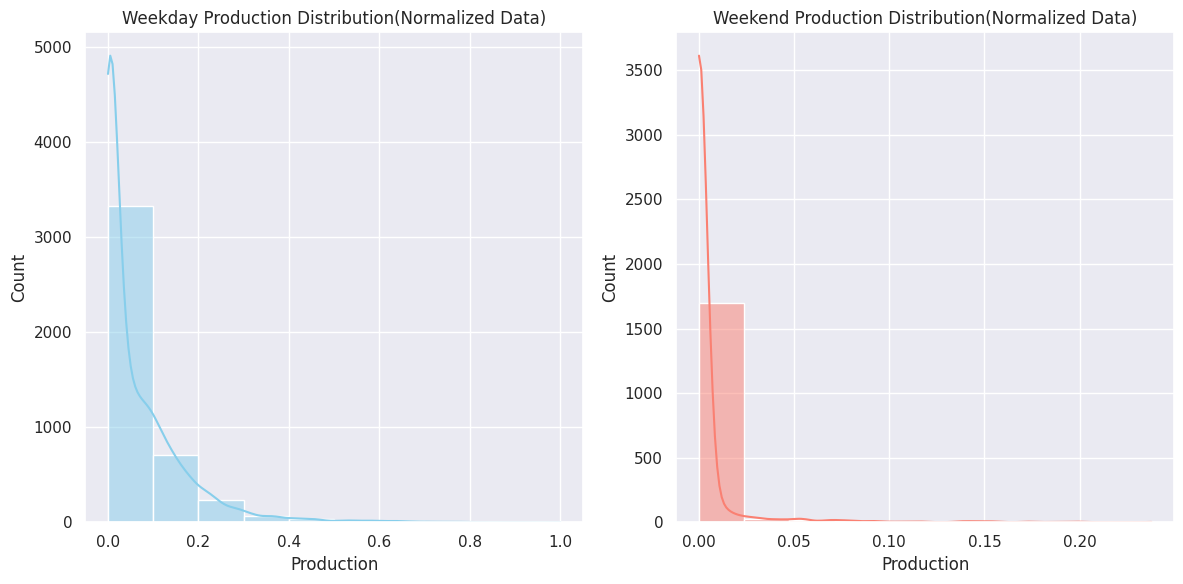

In [ ]:
# Apply scaling to X_train
mm_scaler = MinMaxScaler()

# Apply normalization
df_production_wk['production_normalized'] = mm_scaler.fit_transform(df_production_wk[['production']])

# Separate Weekday(1~5) and Weekend(6, 7)
df_production_wk['weekday_type'] = df_production_wk['day'].apply(
    lambda x: 'Weekday' if x <= 5 else 'Weekend'
)

# Visualize the normalized data
plt.figure(figsize=(12, 6))

# Weekday Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=df_production_wk[df_production_wk['weekday_type'] == 'Weekday'],
             x='production_normalized', bins=10, kde=True, color='skyblue')
plt.title('Weekday Production Distribution(Normalized Data)')
plt.xlabel('Production')
plt.ylabel('Count')

# Weekend Histogram
plt.subplot(1, 2, 2)
sns.histplot(data=df_production_wk[df_production_wk['weekday_type'] == 'Weekend'],
             x='production_normalized', bins=10, kde=True, color='salmon')
plt.title('Weekend Production Distribution(Normalized Data)')
plt.xlabel('Production')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

**Interpretation**

* When examining the original data for `Production`, production is highest in spring and fall, followed by summer, and lowest in winter (with interpretation limitations due to missing data for October, November, and December).
However, it was difficult to identify any discernible patterns. Therefore, criteria were defined to normalize the data, and the data distribution was analyzed accordingly.
1. Monthly Distribution
  * In most months, production is concentrated at low levels below 0.2.
  * For September, production levels are noticeably lower compared to other months.
2. Time Distribution
  * In most time periods, production is concentrated at low levels below 0.2.
  * During 7:00 to 19:00 (daytime), there is a noticeable increase in data in the 0.2–0.4 and 0.4–0.6 ranges.
  * During 20:00 to 6:00 (nighttime), production values are densely clustered close to 0.
3. Weekday/Weekend Distribution
  * Weekdays: Production levels on weekdays show greater variability compared to weekends, with data predominantly concentrated in the range below 0.2.
  * Weekends: Most data is concentrated in the 0.0–0.05 range, indicating that production operations are highly limited.

### **5) Temperature**

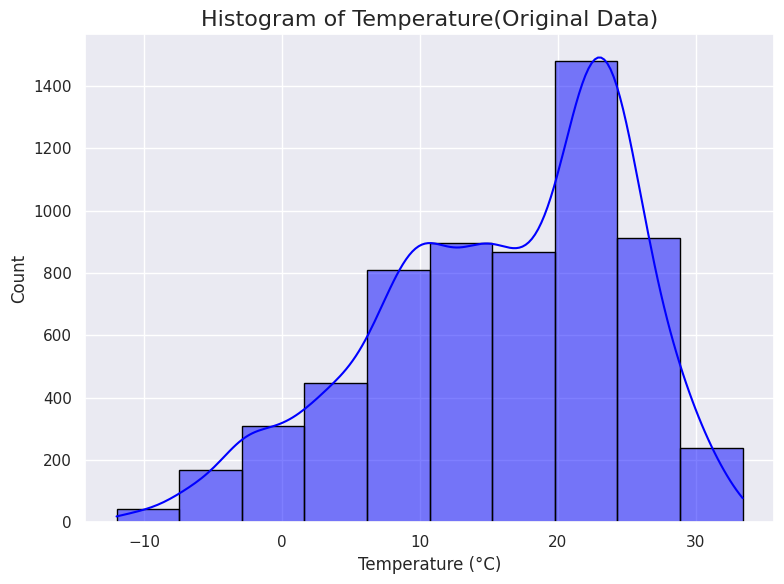

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df_c['temperature'], bins=10, kde=True, color='blue', edgecolor='black')
plt.title('Histogram of Temperature(Original Data)', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

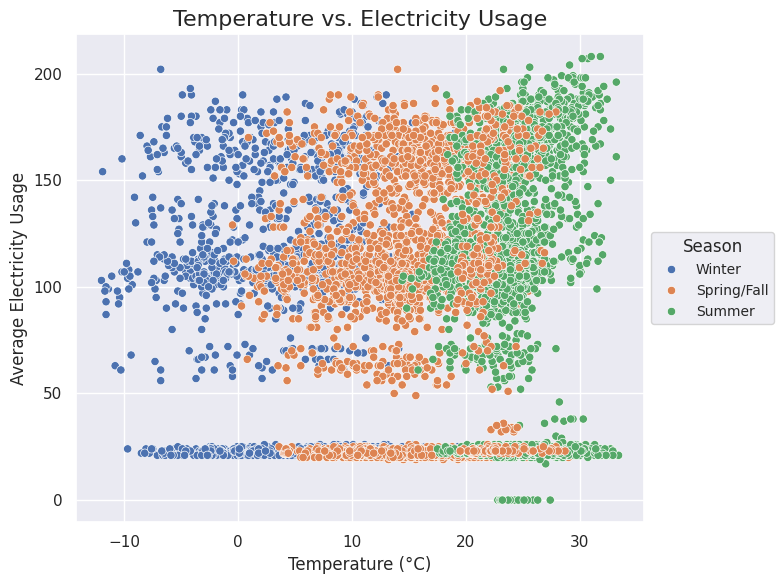

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temperature', y='average', hue='season', data=df2)
plt.title('Temperature vs. Electricity Usage', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Average Electricity Usage', fontsize=12)
plt.legend(title='Season', fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

<ipython-input-37-10dd270a499a>:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels([f'Cluster {i}' for i in range(n_bins)])


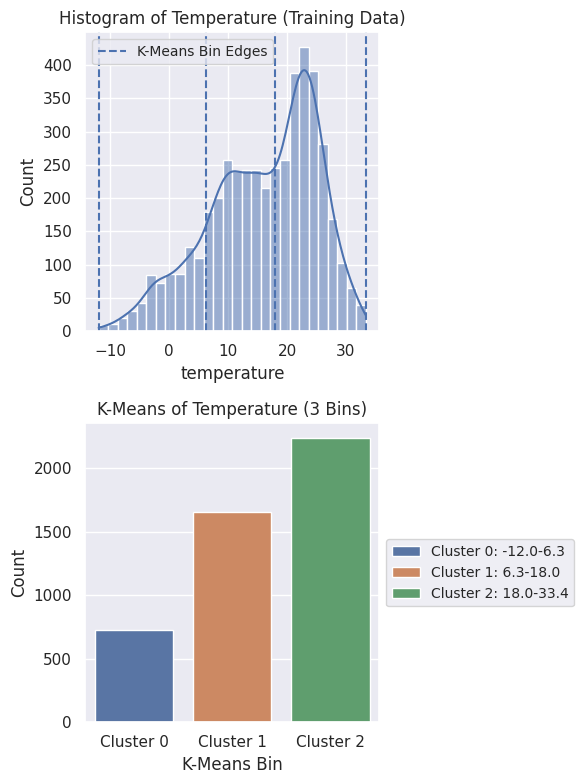

In [ ]:
# Train-test split
X_train, X_test = train_test_split(df_c[['temperature']], test_size=0.25, random_state=42)  # Pass only the necessary column

# Apply k-means binning
n_bins = 3
col_name = 'temperature'
trans_col_name = 'temperature_kmeans'

kbin_discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='kmeans')
X_train[trans_col_name] = kbin_discretizer.fit_transform(X_train[[col_name]])

# Visualization
fig, axes = plt.subplots(nrows=2, figsize=(6, 8))

# Histogram with k-means bin edges
sns.histplot(data=X_train, x=col_name, ax=axes[0], kde=True)
axes[0].set_title('Histogram of Temperature (Training Data)')
for edge in kbin_discretizer.bin_edges_[0]:
    line = axes[0].axvline(edge, color='b', linestyle='--')
axes[0].legend([line], ['K-Means Bin Edges'], fontsize=10)

# K-means binning result count plot
sns.countplot(x=X_train[trans_col_name], hue=X_train[trans_col_name], palette='deep', ax=axes[1])
bin_edges = kbin_discretizer.bin_edges_[0]
bin_labels = [f'Cluster {i}: {bin_edges[i]:.1f}-{bin_edges[i+1]:.1f}' for i in range(len(bin_edges) - 1)]
plt.legend(bin_labels, fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))

axes[1].set_title(f'K-Means of Temperature ({n_bins} Bins)')
axes[1].set_xticklabels([f'Cluster {i}' for i in range(n_bins)])
axes[1].set_xlabel("K-Means Bin")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

<ipython-input-38-0dc4d5d3eda7>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels([f'Cluster {i}' for i in range(n_bins)])


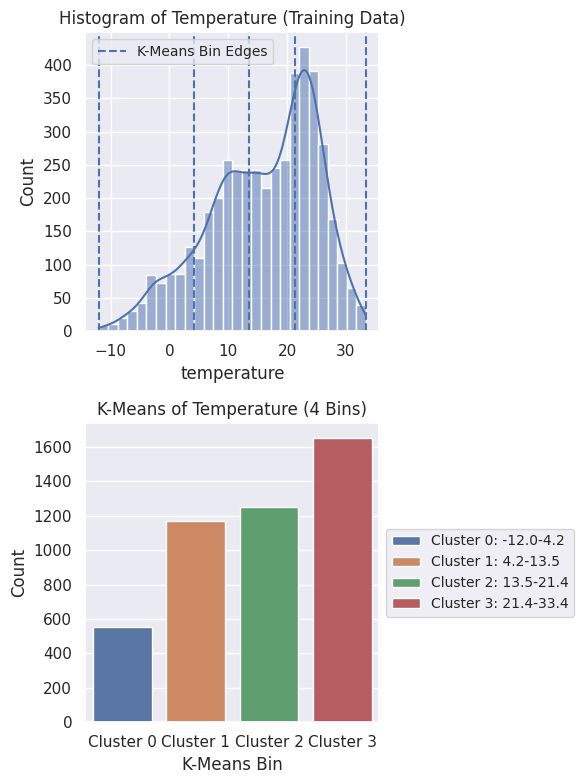

In [ ]:
# Apply k-means binning
n_bins = 4
col_name = 'temperature'
trans_col_name = 'temperature_kmeans'

kbin_discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='kmeans')
X_train[trans_col_name] = kbin_discretizer.fit_transform(X_train[[col_name]])

# Visualization
fig, axes = plt.subplots(nrows=2, figsize=(6, 8))

# Histogram with k-means bin edges
sns.histplot(data=X_train, x=col_name, ax=axes[0], kde=True)
axes[0].set_title('Histogram of Temperature (Training Data)')
for edge in kbin_discretizer.bin_edges_[0]:
    line = axes[0].axvline(edge, color='b', linestyle='--')
axes[0].legend([line], ['K-Means Bin Edges'], fontsize=10)

# K-means binning result count plot
sns.countplot(x=X_train[trans_col_name], hue=X_train[trans_col_name], palette='deep', ax=axes[1])
bin_edges = kbin_discretizer.bin_edges_[0]
bin_labels = [f'Cluster {i}: {bin_edges[i]:.1f}-{bin_edges[i+1]:.1f}' for i in range(len(bin_edges) - 1)]
plt.legend(bin_labels, fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))

axes[1].set_title(f'K-Means of Temperature ({n_bins} Bins)')
axes[1].set_xticklabels([f'Cluster {i}' for i in range(n_bins)])
axes[1].set_xlabel("K-Means Bin")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

<ipython-input-39-e28d5e9a9730>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels([f'Cluster {i}' for i in range(n_bins)])


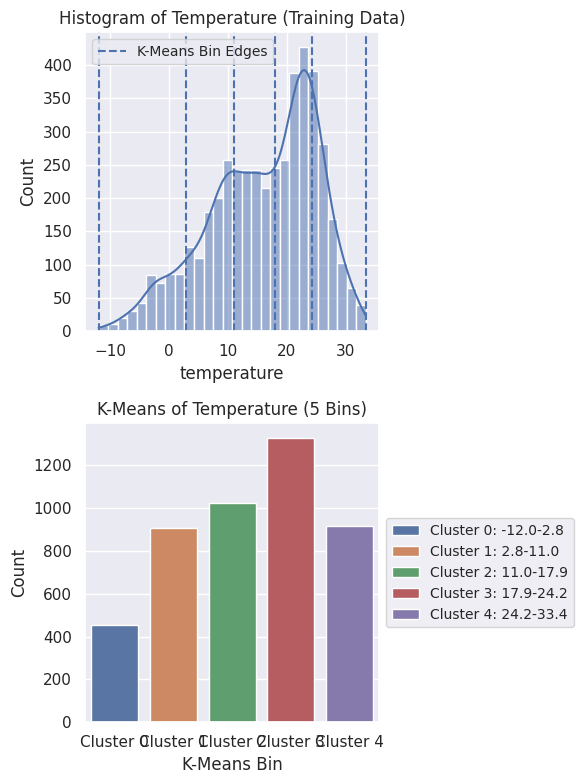

In [ ]:
# Apply k-means binning
n_bins = 5
col_name = 'temperature'
trans_col_name = 'temperature_kmeans'

kbin_discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='kmeans')
X_train[trans_col_name] = kbin_discretizer.fit_transform(X_train[[col_name]])

# Visualization
fig, axes = plt.subplots(nrows=2, figsize=(6, 8))

# Histogram with k-means bin edges
sns.histplot(data=X_train, x=col_name, ax=axes[0], kde=True)
axes[0].set_title('Histogram of Temperature (Training Data)')
for edge in kbin_discretizer.bin_edges_[0]:
    line = axes[0].axvline(edge, color='b', linestyle='--')
axes[0].legend([line], ['K-Means Bin Edges'], fontsize=10)

# K-means binning result count plot
sns.countplot(x=X_train[trans_col_name], hue=X_train[trans_col_name], palette='deep', ax=axes[1])
bin_edges = kbin_discretizer.bin_edges_[0]
bin_labels = [f'Cluster {i}: {bin_edges[i]:.1f}-{bin_edges[i+1]:.1f}' for i in range(len(bin_edges) - 1)]
plt.legend(bin_labels, fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))

axes[1].set_title(f'K-Means of Temperature ({n_bins} Bins)')
axes[1].set_xticklabels([f'Cluster {i}' for i in range(n_bins)])
axes[1].set_xlabel("K-Means Bin")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

**Interpretation**

* Temperature Distribution (3 Bins)
  * The data was divided into 3 clusters:
    * Cluster 0: -12.0 ~ 6.3
    * Cluster 1: 6.3 ~ 18.0
    * Cluster 2: 18.0 ~ 33.4
  * The largest amount of data is distributed in Cluster 2, indicating that data is concentrated in the higher temperature range.
  * The smallest amount of data is distributed in Cluster 0, indicating fewer data points in the lower temperature range.
* Temperature Distribution (4 Bins)
  * The data was divided into 4 clusters:
    * Cluster 0: -12.0 ~ 4.2
    * Cluster 1: 4.2 ~ 13.5
    * Cluster 2: 13.5 ~ 21.4
    * Cluster 3: 21.4 ~ 33.4
  * The largest amount of data is distributed in Cluster 3, indicating that data is concentrated in the higher temperature range.
  * The smallest amount of data is distributed in Cluster 0, indicating fewer data points in the lower temperature range.
* Temperature Distribution (5 Bins)
  * The data was divided into 5 clusters:
    * Cluster 0: -12.0 ~ 2.8
    * Cluster 1: 2.8 ~ 11.0
    * Cluster 2: 11.0 ~ 17.9
    * Cluster 3: 17.9 ~ 24.2
    * Cluster 4: 24.2 ~ 33.4
  * The largest amount of data is distributed in Cluster 3, indicating that data is concentrated in the higher temperature range.
  * The smallest amount of data is distributed in Cluster 0, indicating fewer data points in the lower temperature range.
* As temperature increases, electricity consumption tends to rise.
This suggests that air conditioning usage on hotter days is a major factor in electricity consumption.

### **6) Factory Staff**

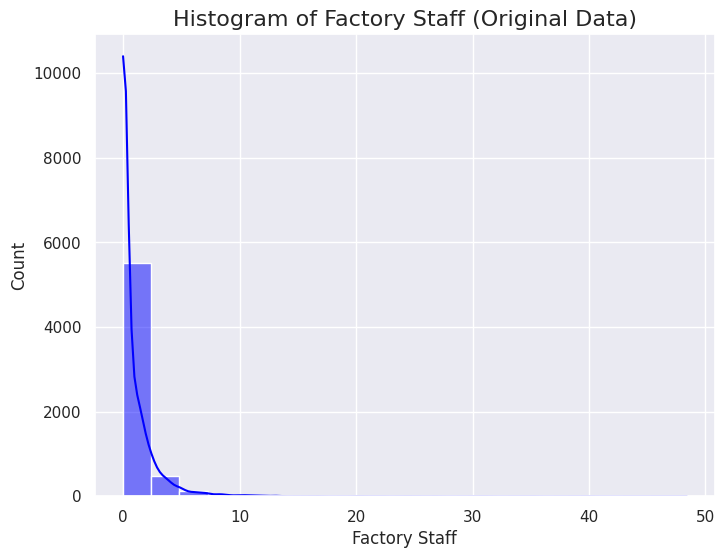

In [ ]:
# Factory Staff Histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=df_c, x='factory_staff', bins=20, kde=True, color='blue')
plt.title("Histogram of Factory Staff (Original Data)", fontsize=16)
plt.xlabel("Factory Staff")
plt.ylabel("Count")
plt.show()

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df_c[['factory_staff']],
    df_c['average'],
    shuffle=True,
    test_size=0.25,
    random_state=712
)

# Apply scaling to X_train
mm_scaler = MinMaxScaler()
z_scaler = StandardScaler()
r_scaler = RobustScaler()

# Add scaled columns to X_train
X_train['MinMax_Scaled'] = mm_scaler.fit_transform(X_train[['factory_staff']])
X_train['ZScore_Scaled'] = z_scaler.fit_transform(X_train[['factory_staff']])
X_train['Robust_Scaled'] = r_scaler.fit_transform(X_train[['factory_staff']])

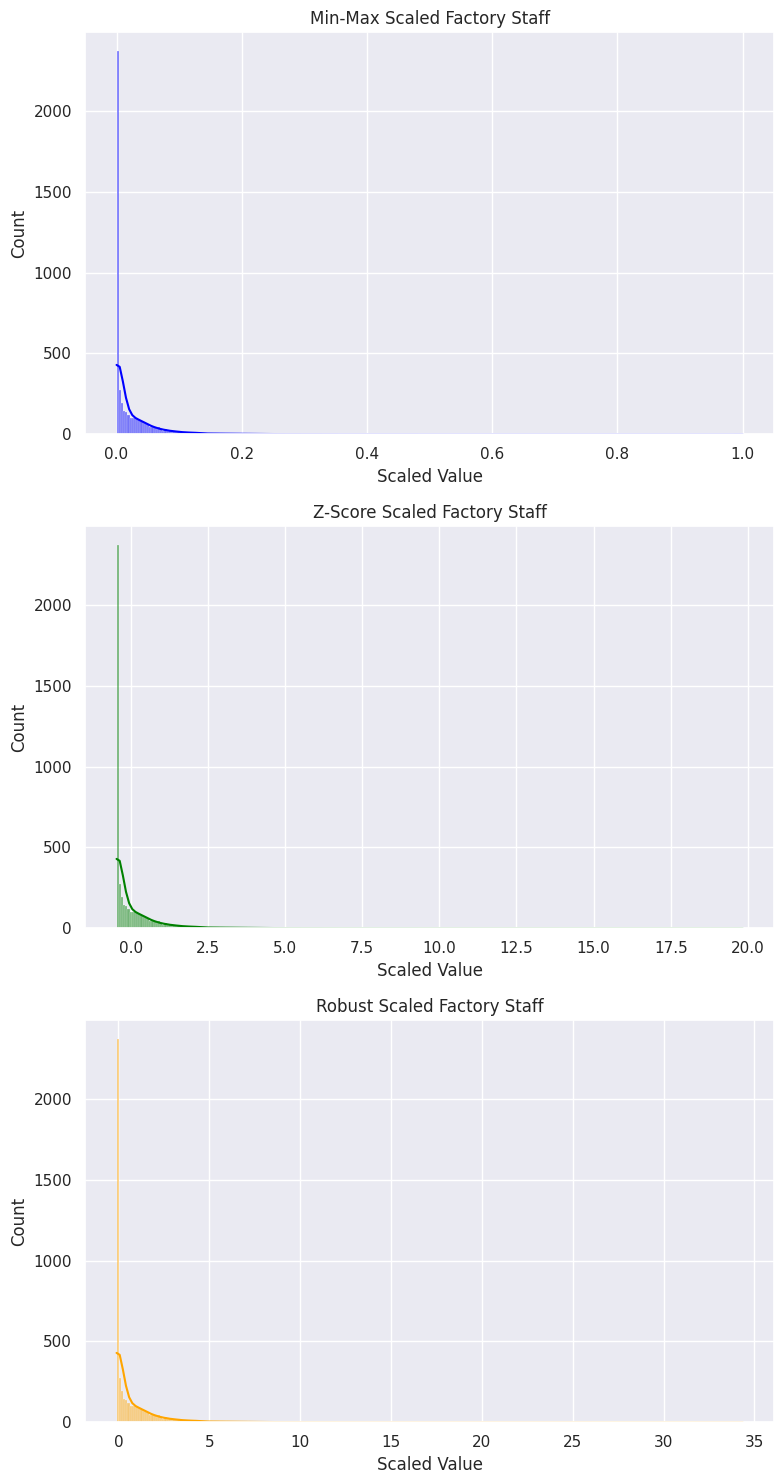

In [ ]:
# Visualization
fig, axes = plt.subplots(nrows=3, figsize=(8, 15))

# Min-Max Scaling Histogram
sns.histplot(data=X_train, x='MinMax_Scaled', ax=axes[0], kde=True, color='blue')
axes[0].set_title("Min-Max Scaled Factory Staff")
axes[0].set_xlabel("Scaled Value")
axes[0].set_ylabel("Count")

# Z-Score Scaling Histogram
sns.histplot(data=X_train, x='ZScore_Scaled', ax=axes[1], kde=True, color='green')
axes[1].set_title("Z-Score Scaled Factory Staff")
axes[1].set_xlabel("Scaled Value")
axes[1].set_ylabel("Count")

# Robust Scaling Histogram
sns.histplot(data=X_train, x='Robust_Scaled', ax=axes[2], kde=True, color='orange')
axes[2].set_title("Robust Scaled Factory Staff")
axes[2].set_xlabel("Scaled Value")
axes[2].set_ylabel("Count")

plt.tight_layout()
plt.show()



---



In [ ]:
df_factory_staff = df_c[['factory_staff']]
df_factory_staff.index = index_column
df_factory_staff.index.names = ['Date']
df_factory_staff.head()

,factory_staff
Date,
2021-01-01 00:00:00,0.0
2021-01-01 01:00:00,0.0
2021-01-01 02:00:00,0.0
2021-01-01 03:00:00,0.0
2021-01-01 04:00:00,0.0


In [ ]:
df_factory_staff['factory_staff'] = [float(str(val).replace('.','').replace(',','.')) for val in df_factory_staff['factory_staff'].values]
df_factory_staff.head()

<ipython-input-44-55936f104ed6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_factory_staff['factory_staff'] = [float(str(val).replace('.','').replace(',','.')) for val in df_factory_staff['factory_staff'].values]


,factory_staff
Date,
2021-01-01 00:00:00,0.0
2021-01-01 01:00:00,0.0
2021-01-01 02:00:00,0.0
2021-01-01 03:00:00,0.0
2021-01-01 04:00:00,0.0


<ipython-input-45-22573081c31d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_factory_staff['Month'] = df_production.index.month
<ipython-input-45-22573081c31d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_factory_staff['factory_staff_normalized'] = mm_scaler.fit_transform(df_factory_staff[['factory_staff']])


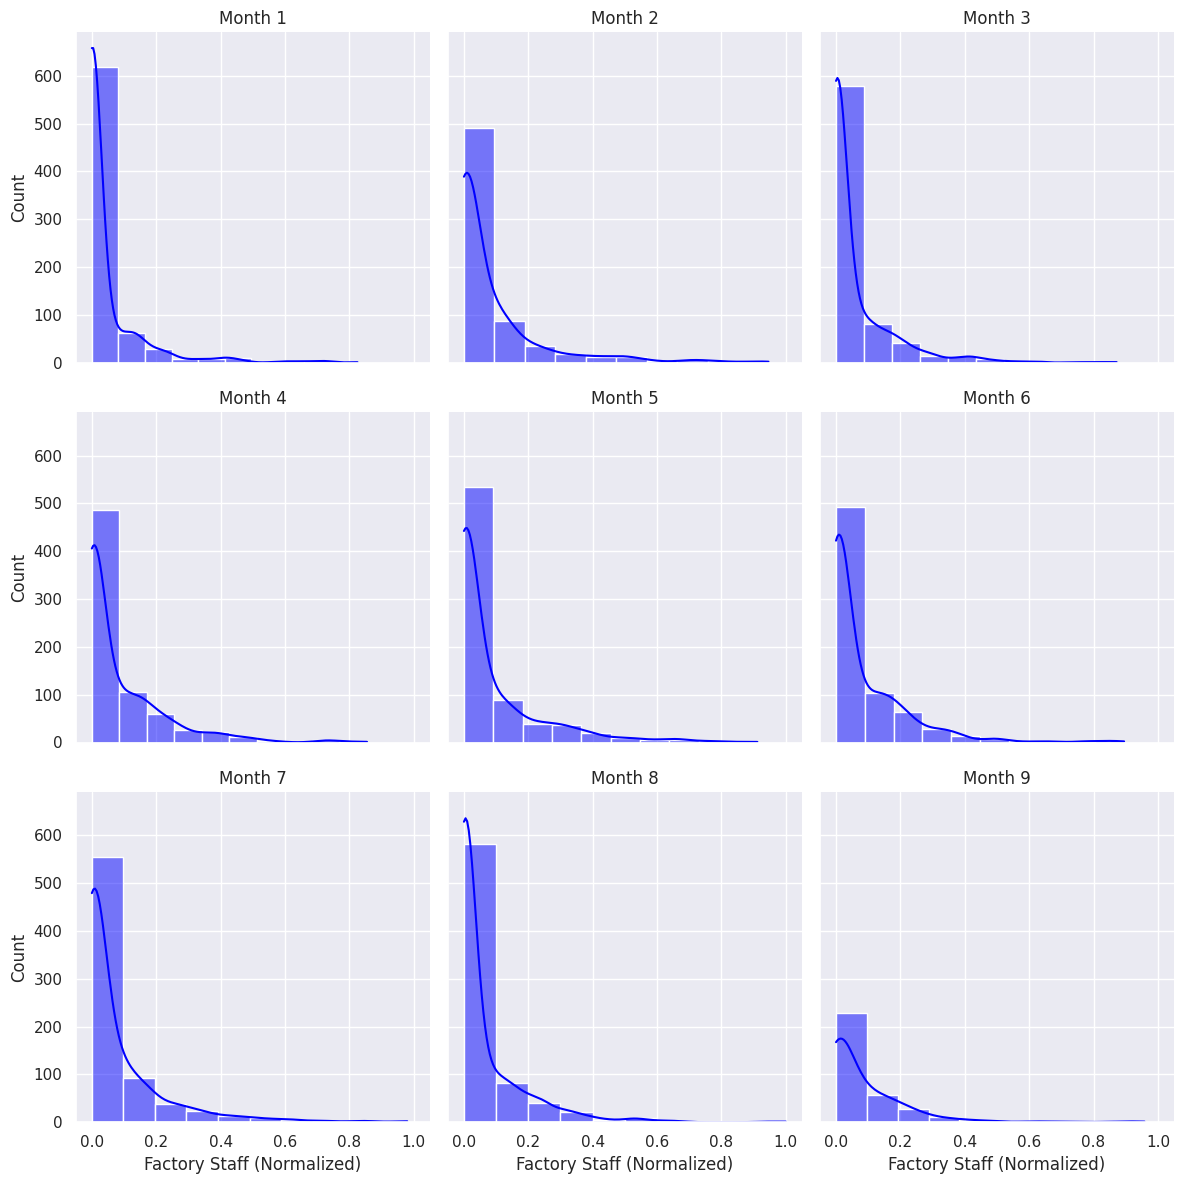

In [ ]:
# Add Month
df_factory_staff['Month'] = df_production.index.month

# Apply scaling to X_train
mm_scaler = MinMaxScaler()

# Apply normalization
df_factory_staff['factory_staff_normalized'] = mm_scaler.fit_transform(df_factory_staff[['factory_staff']])

# Visualize the normalized data
g = sns.FacetGrid(df_factory_staff, col='Month', col_wrap=3, sharex=True, sharey=True, height=4)
g.map(sns.histplot, 'factory_staff_normalized', bins=10, kde=True, color='blue')

g.set_titles("Month {col_name}")
g.set_axis_labels("Factory Staff (Normalized)", "Count")
g.tight_layout()
plt.show()

<ipython-input-46-3715937ccf04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_factory_staff['Hour'] = df_factory_staff.index.hour
<ipython-input-46-3715937ccf04>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_factory_staff['factory_staff_normalized'] = mm_scaler.fit_transform(df_factory_staff[['factory_staff']])


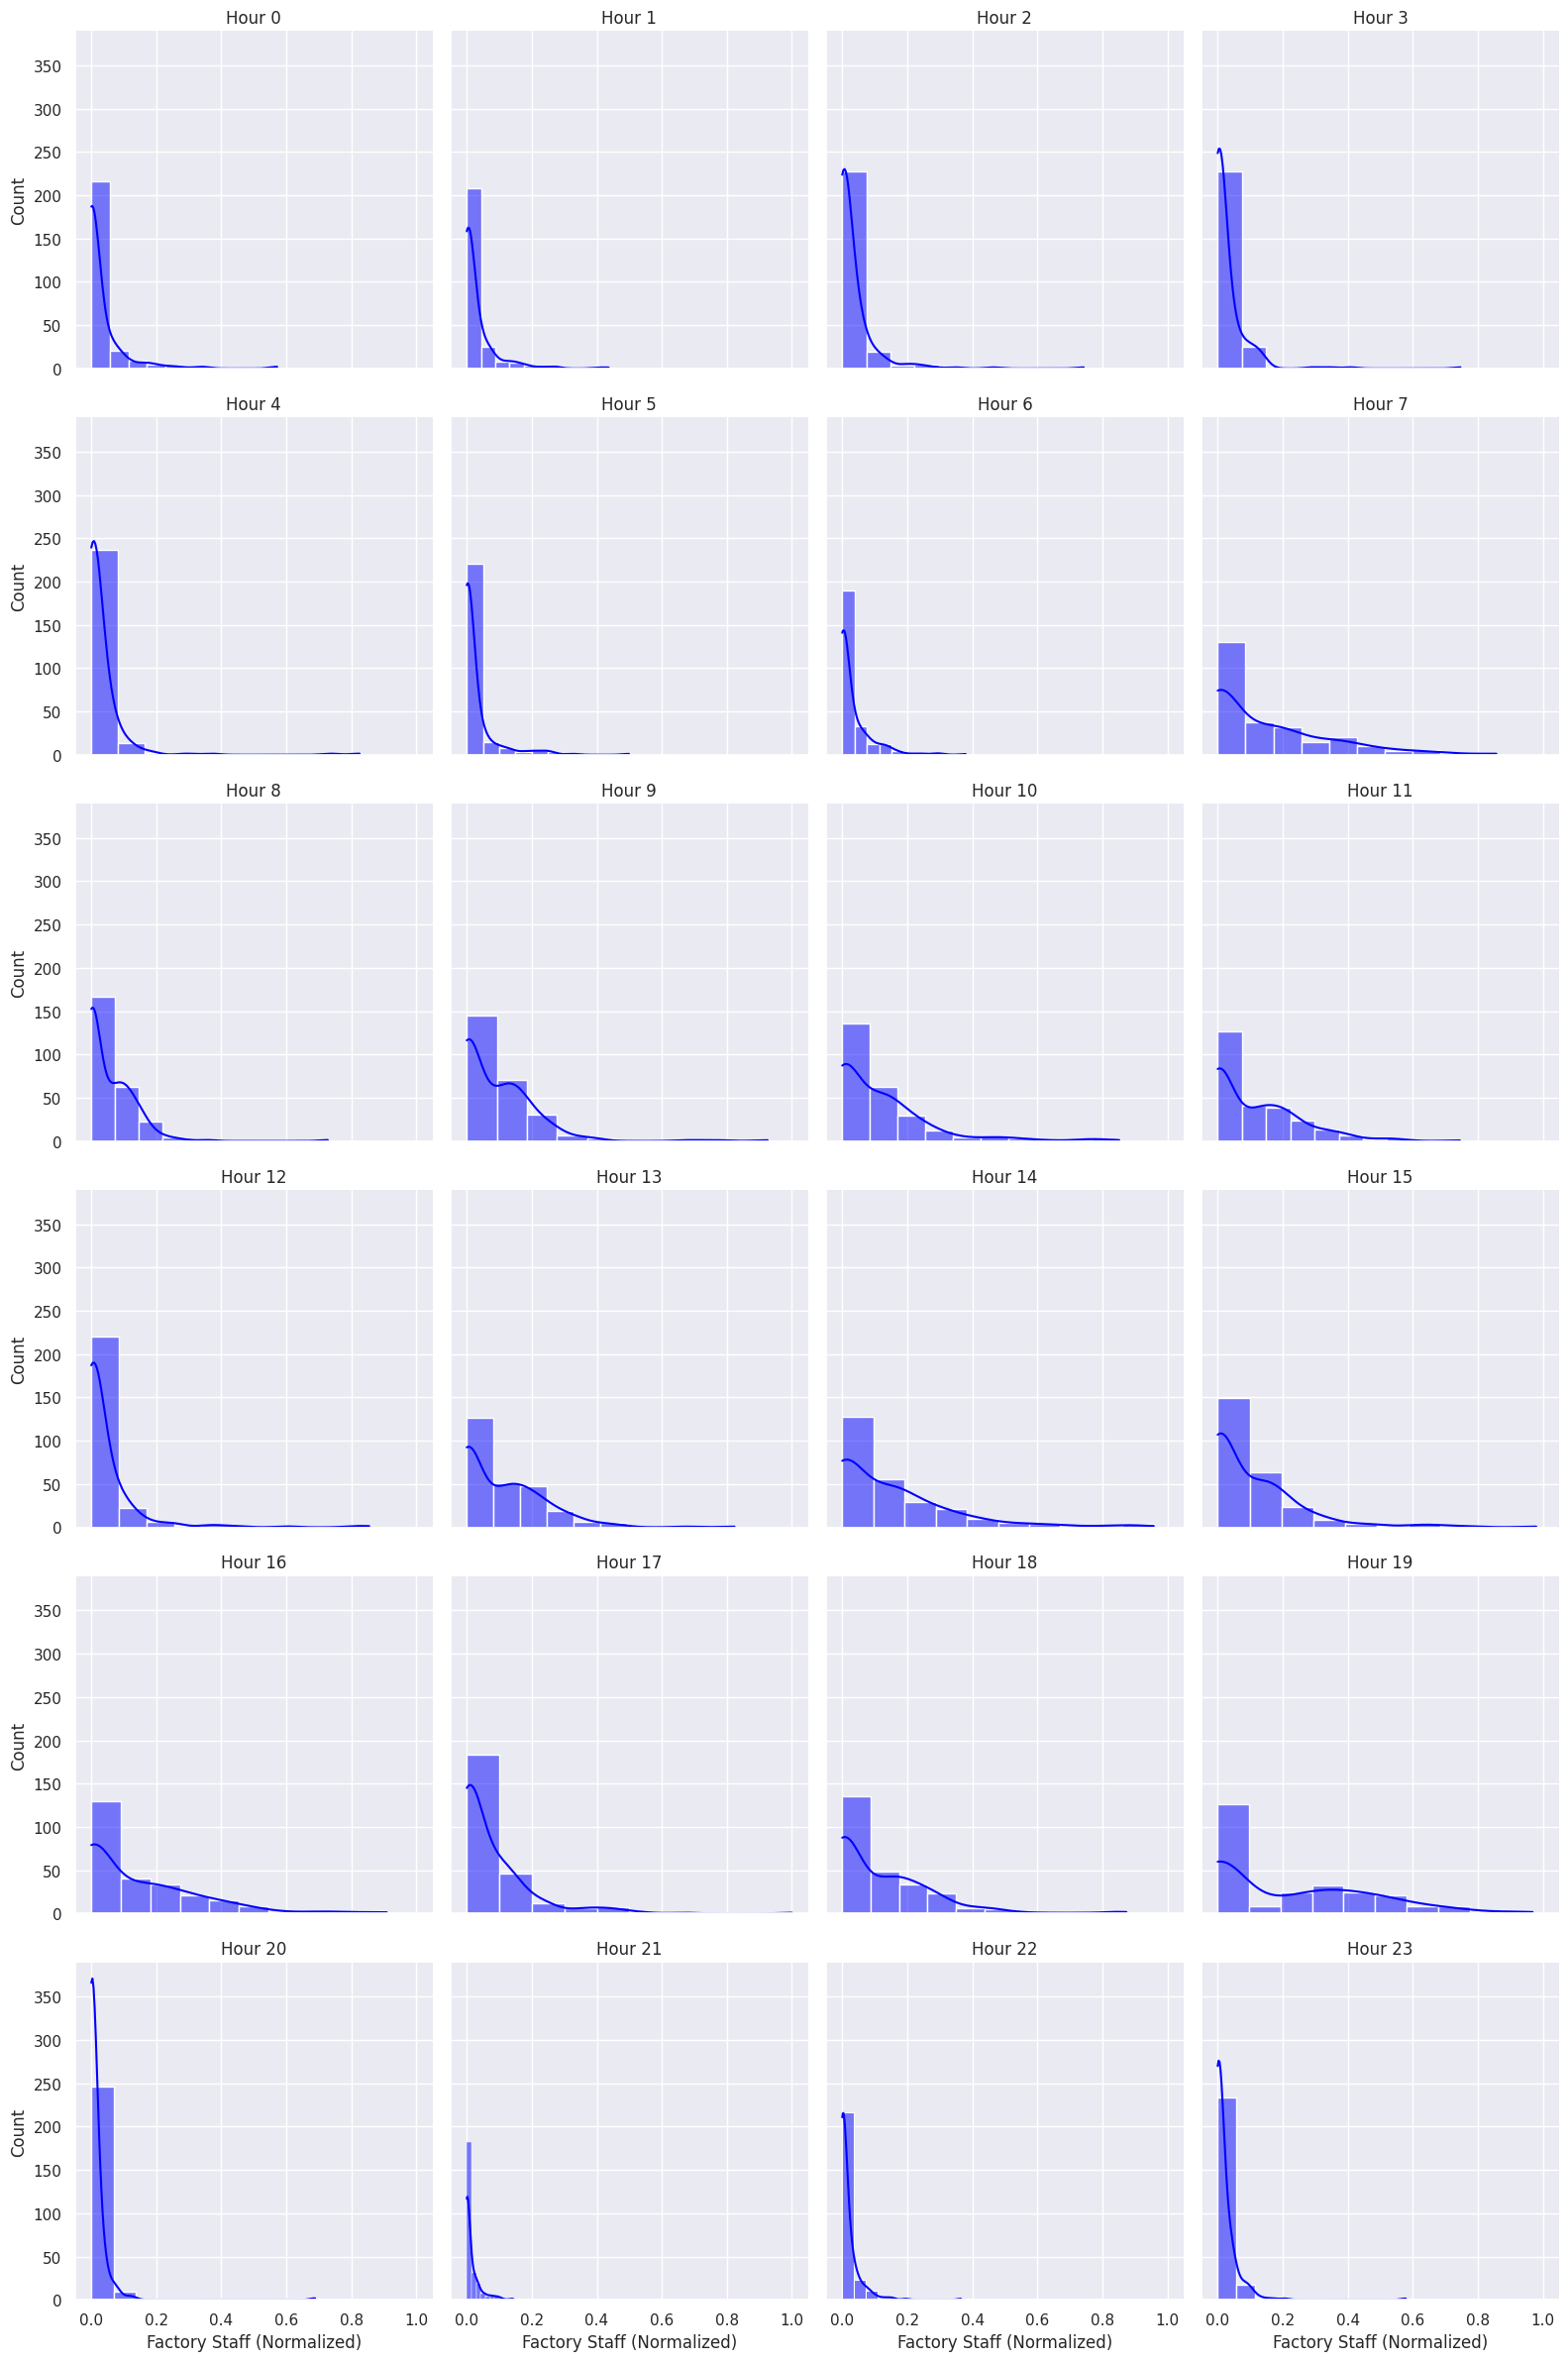

In [ ]:
# Add Hour
df_factory_staff['Hour'] = df_factory_staff.index.hour

# Apply scaling to X_train
mm_scaler = MinMaxScaler()

# Apply normalization
df_factory_staff['factory_staff_normalized'] = mm_scaler.fit_transform(df_factory_staff[['factory_staff']])

# Visualize the normalized data
g = sns.FacetGrid(df_factory_staff, col='Hour', col_wrap=4, sharex=True, sharey=True, height=4)
g.map(sns.histplot, 'factory_staff_normalized', bins=10, kde=True, color='blue')

g.set_titles("Hour {col_name}")
g.set_axis_labels("Factory Staff (Normalized)", "Count")
g.tight_layout()
plt.show()

**Interpretation**

* Scaling
  * Min-Max Scaling, Z-Score Scaling, and Robust Scaling were applied. Most data is densely concentrated around 0, and no outliers were detected.
  * The data distribution exhibits a right-skewed asymmetric pattern.
* Monthly Distribution
  * In most months, the number of factory staff working is concentrated at low levels below 0.2.
  * For September, the number of factory staff working is noticeably lower compared to other months.
* Time Distribution
  * In most time periods, the number of factory staff is concentrated at low levels below 0.2.
  * During 7:00 to 19:00 (daytime), there is an increasing pattern in the 0.2–0.4 and 0.4–0.6 ranges.
  * During 20:00 to 6:00 (nighttime), the number of factory staff working is densely clustered near 0.
* It appears that employees typically work in small groups.

### **7) Labor Cost**

In [ ]:
labor_cost_counts = df_c.copy()

labor_cost_counts = labor_cost_counts['labor_cost'].value_counts().reset_index()
labor_cost_counts.columns = ['labor_cost', 'count']
labor_cost_counts.head()

,labor_cost,count
0,1.5,3873
1,1.0,2295


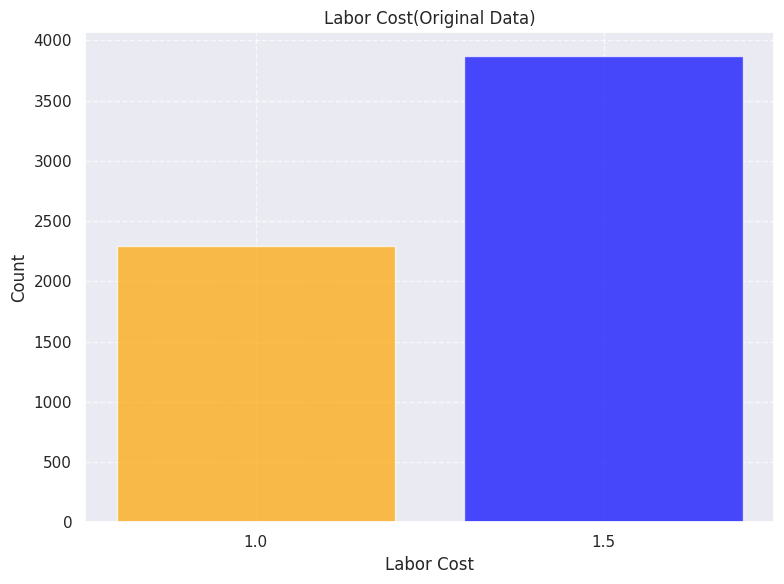

In [ ]:
# Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(
    x=labor_cost_counts['labor_cost'],
    height=labor_cost_counts['count'],
    color=['blue', 'orange'],
    alpha=0.7,
    width=0.4,
    align='center'
)

plt.title("Labor Cost(Original Data)")
plt.xlabel("Labor Cost")
plt.ylabel("Count")
plt.xticks(labor_cost_counts['labor_cost'])
plt.grid(linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()



---



In [ ]:
df2['labor_cost_day_night'] = df2['labor_cost'].apply(lambda x: 'day(9-17)' if x == 1.0 else ('night(18-8)' if x == 1.5 else None))

# y - labor cost(1.0, 1.5)
# x - 1~9 Month
# hue - day/night
index_column = pd.date_range(start ='2021-01-01 00:00', end ='2021-09-14 23:00', freq ='H')
df2_monthly_labor_cost = df2.drop(columns= ['date', 'hour', 'production', 'temperature', 'day', 'm'])
df2_monthly_labor_cost.index = index_column
df2_monthly_labor_cost.index.names = ['Date']

# pivot table
df2_monthly_labor_cost['Month'] = df2_monthly_labor_cost.index.month
df2_monthly_average_pivot_table = df2_monthly_labor_cost.pivot_table(values='labor_cost', index='Month', columns='labor_cost_day_night', aggfunc='mean')
df2_monthly_average_pivot_table.columns = ['day(9-17)', 'night(18-8)']
df2_monthly_average_pivot_table

<ipython-input-49-8df0c30a80d2>:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index_column = pd.date_range(start ='2021-01-01 00:00', end ='2021-09-14 23:00', freq ='H')


,day(9-17),night(18-8)
Month,,
1,1.0,1.5
2,1.0,1.5
3,1.0,1.5
4,1.0,1.5
5,1.0,1.5
6,1.0,1.5
7,1.0,1.5
8,1.0,1.5
9,1.0,1.5


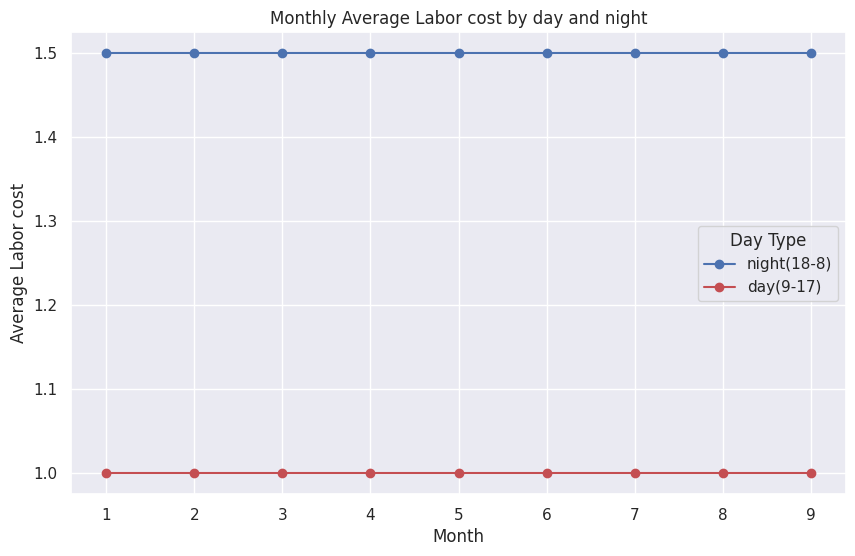

In [ ]:
# Line Chart
plt.figure(figsize=(10, 6))
plt.plot(df2_monthly_average_pivot_table.index, df2_monthly_average_pivot_table['night(18-8)'], marker='o', color='b', label='night(18-8)')
plt.plot(df2_monthly_average_pivot_table.index, df2_monthly_average_pivot_table['day(9-17)'], marker='o', color='r', label='day(9-17)')

plt.title("Monthly Average Labor cost by day and night")
plt.xlabel("Month")
plt.ylabel("Average Labor cost")
plt.legend(title="Day Type")
plt.grid(True)
plt.show()

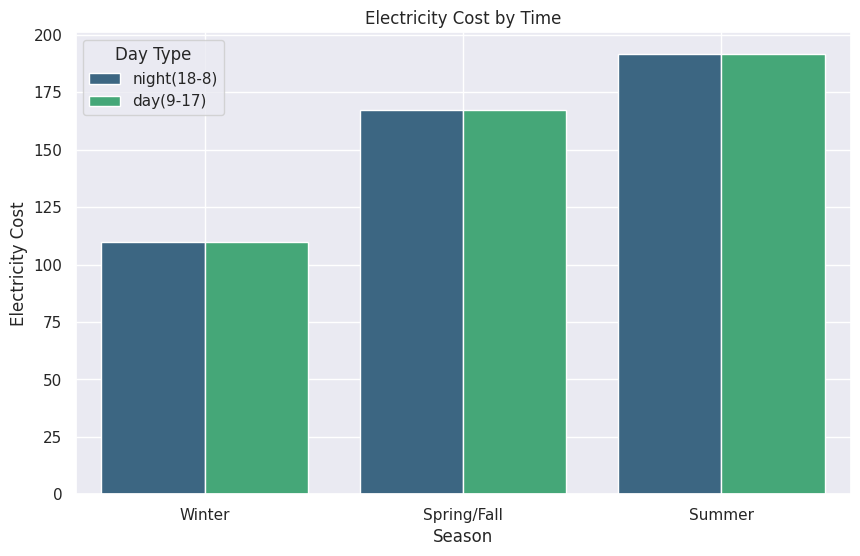

In [ ]:
# Histogram
plt.figure(figsize=(10,6))
sns.barplot(x='season', y='electricity_cost', hue='labor_cost_day_night', data=df2, palette='viridis')
plt.title("Electricity Cost by Time")
plt.legend(title="Day Type")
plt.xlabel("Season")
plt.ylabel("Electricity Cost")
plt.grid(True)
plt.show()

**Interpretation**
* Upon examining the original data, labor cost is categorized into 1.0 and 1.5.
* When dividing the data into day and night, it was observed that day labor cost is 1.0, while night labor cost is 1.5.
  * This is likely due to the inclusion of night shift allowances in the night hours, making the labor cost higher than during the day.
* When categorized by season, most data is distributed in summer, while the least data is distributed in winter.
* To reduce labor costs, minimizing operations during summer and night hours is crucial.